# 14/05/13 - Estudos de redes com até duas camadas e de 4 a 16 neurônios


## Resumo

- Função de perda: RMSE
- Parânmetros do modelo: k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0
- Funções de  ativação: 
    - Elu
    - LeakyReLU
    - Sigmoid
    - Tanh
- Tamanhos de batelada e épocas:
    - (10000, 500)
    - (5000, 1000)

- Arquivo de checkpoint: 1715715532

In [2]:
import glob
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

In [4]:
result_list = glob.glob("edo_pinn_sim/*")

print("numero de arquiteturas testadas: {}".format(len(result_list)))

numero de arquiteturas testadas: 312


In [23]:
results_dict = {}

error_list = []

speed_list = []
tmp_list = []

for file in result_list:
    i = len(error_list)
    if file.split(".")[-1] == "pkl":
        with open(file, "rb") as f:
            results_dict[i] = pk.load(f)

        results_dict[i]["arch_name"] = file.split("/")[-1].split(".")[0]

        tmp_list.append(results_dict[i]["max_ae"])
        error_list.append(results_dict[i]["rmse"])
        speed_list.append(
            results_dict[i]["mean_speed_up"] - results_dict[i]["std_speed_up"]
        )

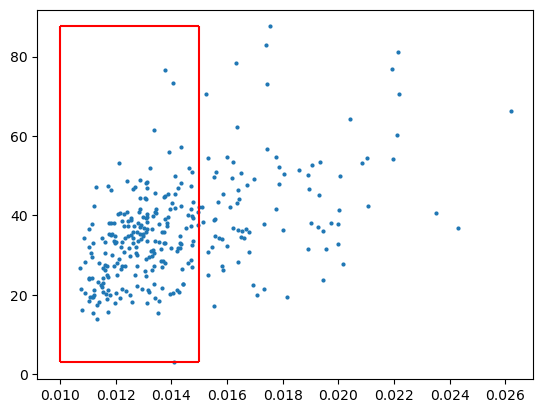

In [24]:
plt.scatter(error_list, speed_list, s=4)
plt.hlines(max(speed_list), 0.01, 0.015, color="r")
plt.hlines(min(speed_list), 0.01, 0.015, color="r")
plt.vlines(0.01, min(speed_list), max(speed_list), color="r")
plt.vlines(0.015, min(speed_list), max(speed_list), color="r")
plt.show()

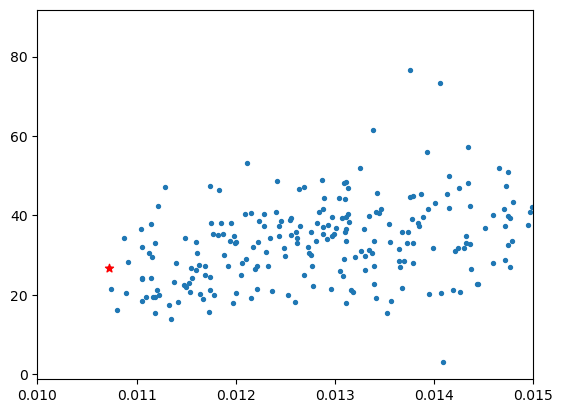

Arquitetura escolhida: epochs_500__batch_10000__arch_Elu--8__Tanh--8__


In [25]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 25), np.argwhere(np.array(error_list) < 0.0108)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01, 0.015)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

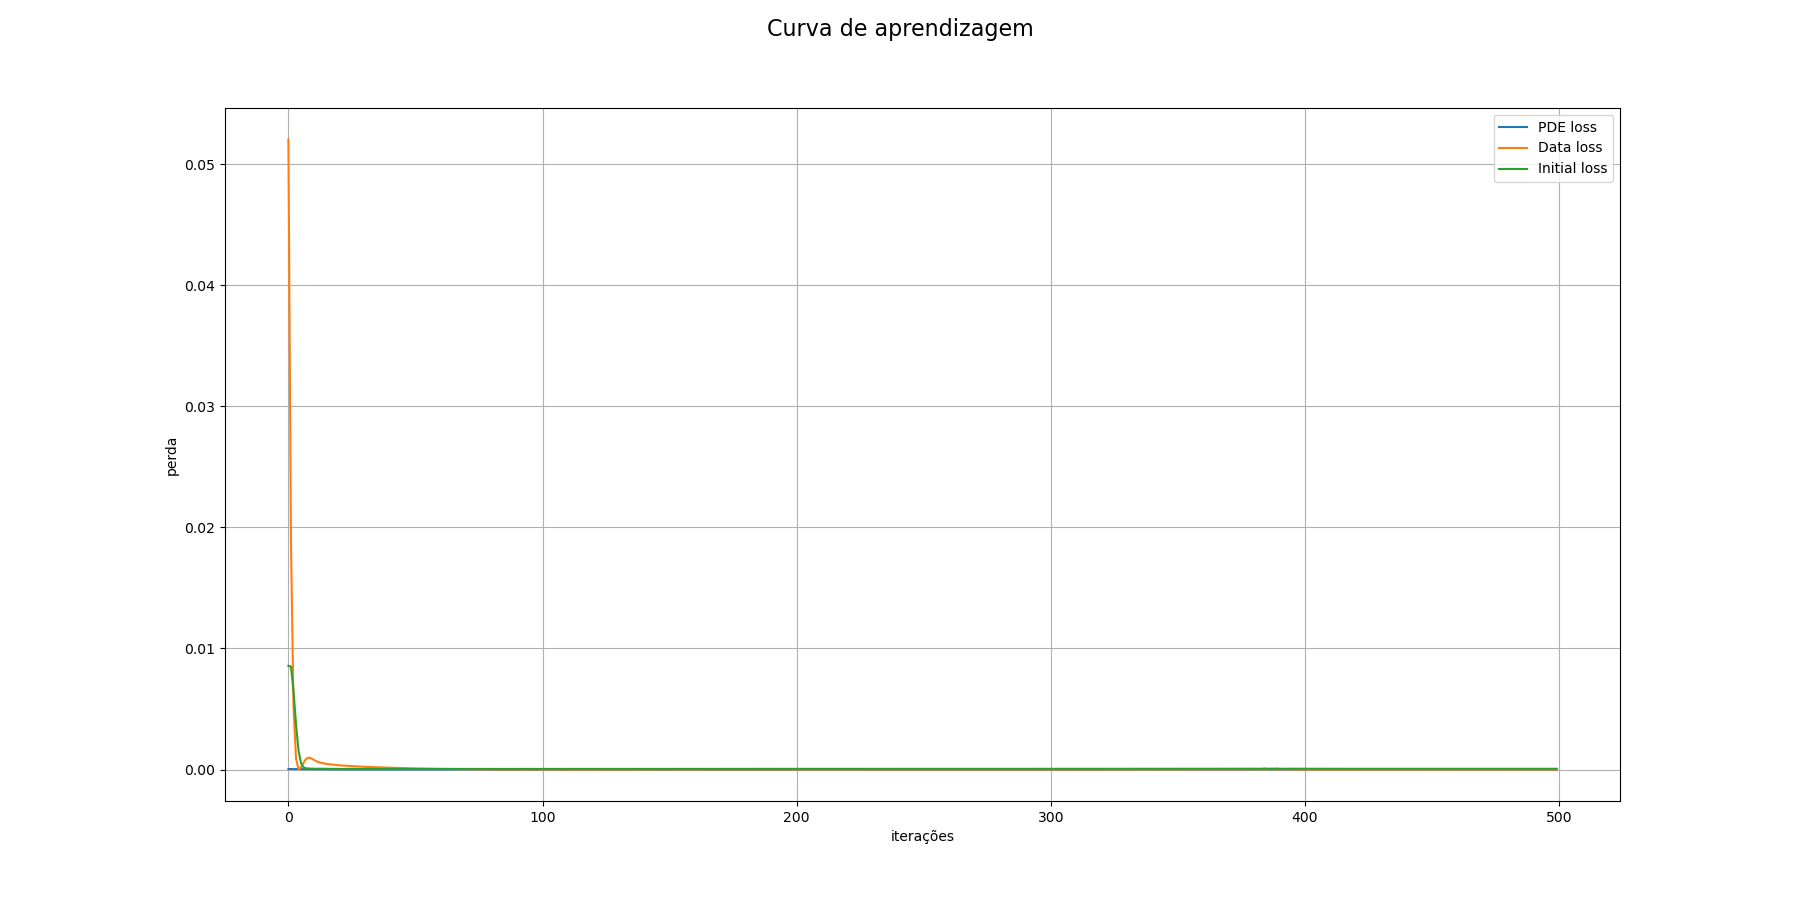

In [27]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

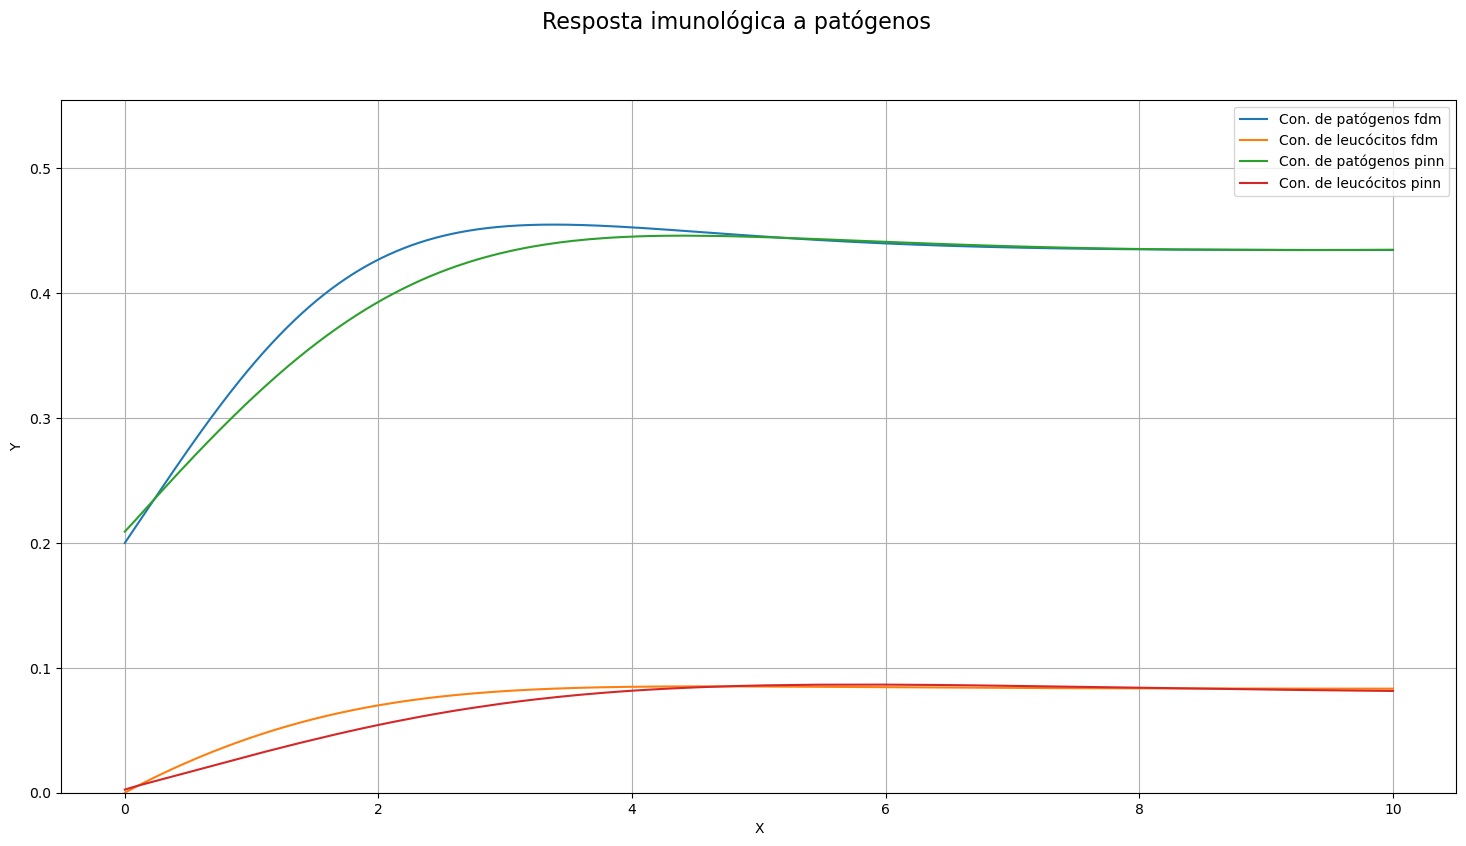

Speed Up: 28.21896935996495 +/-1.442275664514815


In [28]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cp_pinn, label="Con. de patógenos pinn")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl_pinn, label="Con. de leucócitos pinn")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

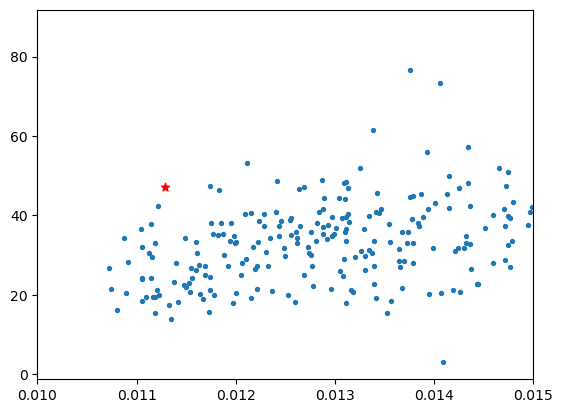

Arquitetura escolhida: epochs_1000__batch_5000__arch_Elu--4__LeakyReLU--4__


In [34]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 43), np.argwhere(np.array(error_list) < 0.0115)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01, 0.015)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

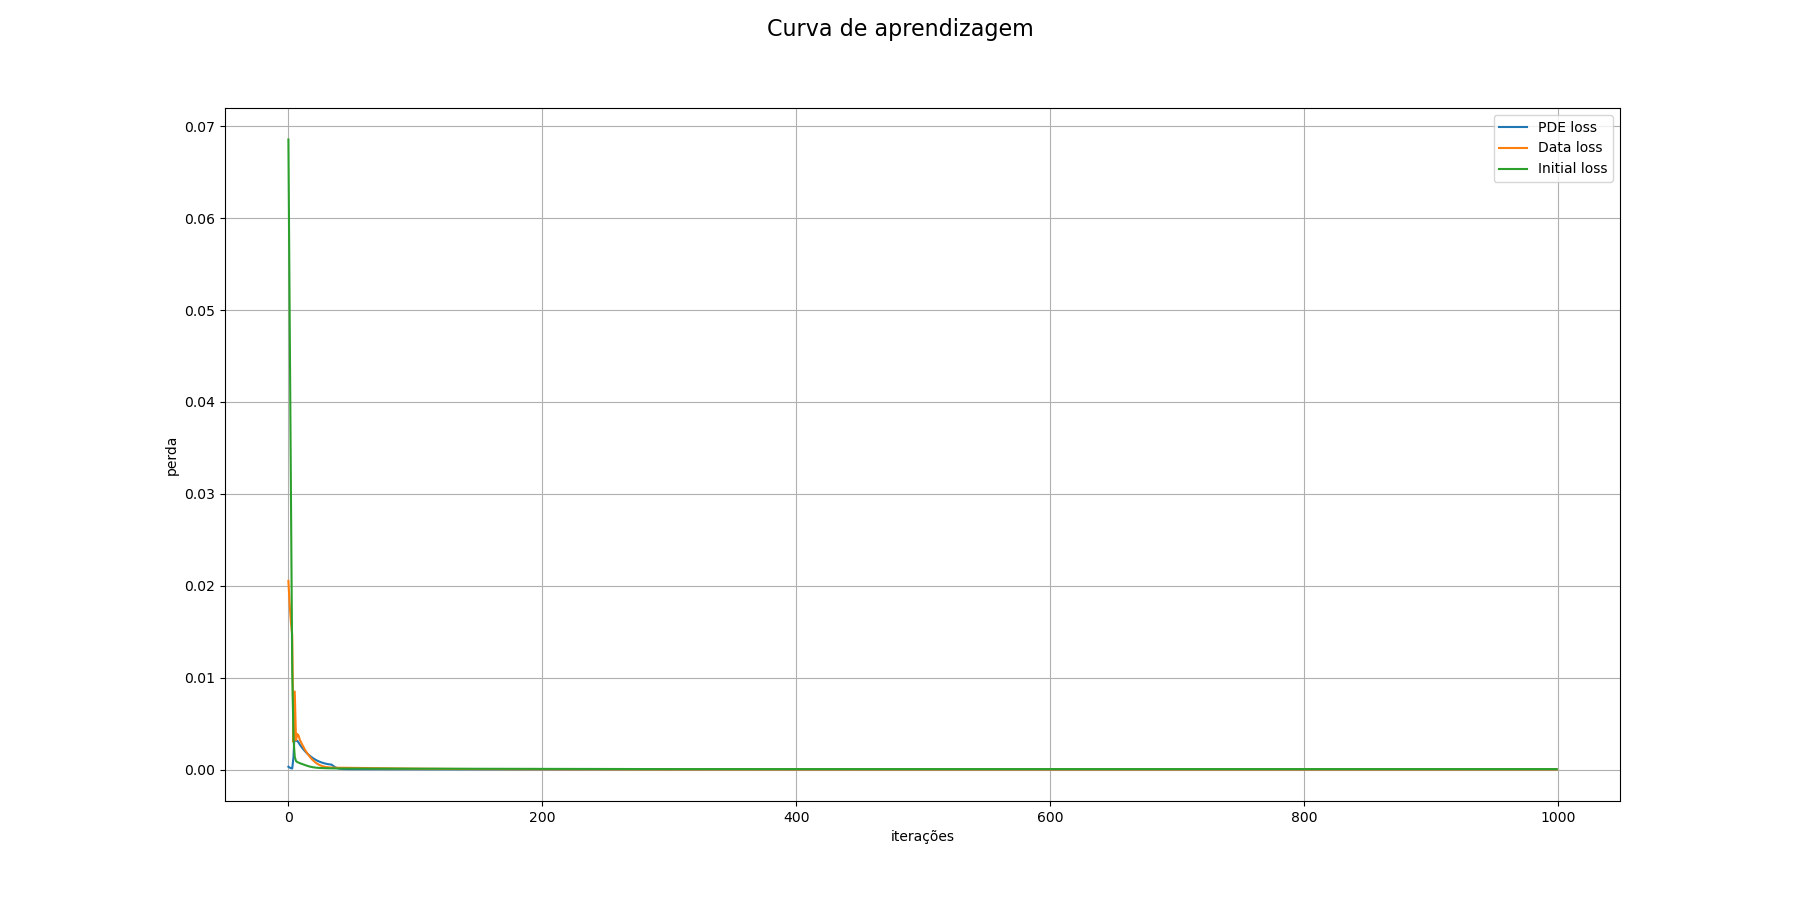

In [35]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

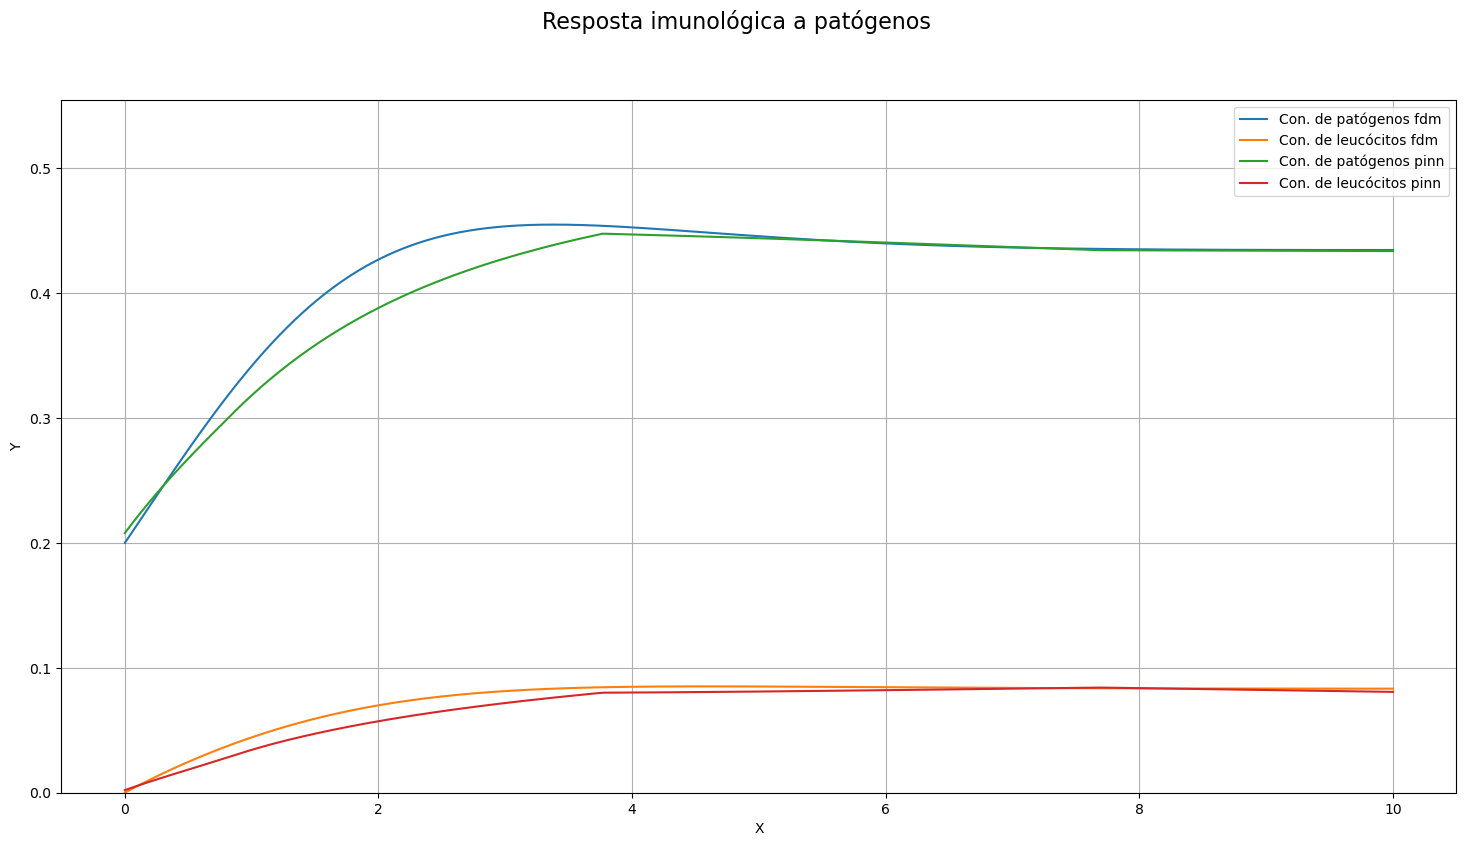

Speed Up: 51.37907646003299 +/-4.162797695602298


In [36]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cp_pinn, label="Con. de patógenos pinn")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl_pinn, label="Con. de leucócitos pinn")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

## Obs
Talvez seja um bom estudo treinar as redes usando perda com a norma L2 e mudar os pesos da perda de condição inicial

# 15/05/13 - Estudos de redes com até duas camadas e de 4 a 16 neurônios e peso na perda da condição inicial


## Resumo

- Função de perda: RMSE
- Parânmetros do modelo: k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0
- Funções de  ativação: 
    - Elu
    - LeakyReLU
    - Sigmoid
    - Tanh
    - ReLU
    - RReLU
    - SELU
    - CELU
    - SiLU
    - GLU

- Tamanhos de batelada e épocas:
    - (10000, 500)
    - (5000, 1000)

- Arquivo de checkpoint: 1715799758

- Peso da perda de cond. inicial: 10

In [1]:
import glob
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
result_list = glob.glob("edo_pinn_sim/*")

print("numero de arquiteturas testadas: {}".format(len(result_list)))

numero de arquiteturas testadas: 1477


In [3]:
results_dict = {}

error_list = []

speed_list = []
tmp_list = []

for file in result_list:
    i = len(error_list)
    if file.split(".")[-1] == "pkl":
        with open(file, "rb") as f:
            results_dict[i] = pk.load(f)

        results_dict[i]["arch_name"] = file.split("/")[-1].split(".")[0]

        tmp_list.append(results_dict[i]["max_ae"])
        error_list.append(results_dict[i]["rmse"])
        speed_list.append(
            results_dict[i]["mean_speed_up"] - results_dict[i]["std_speed_up"]
        )

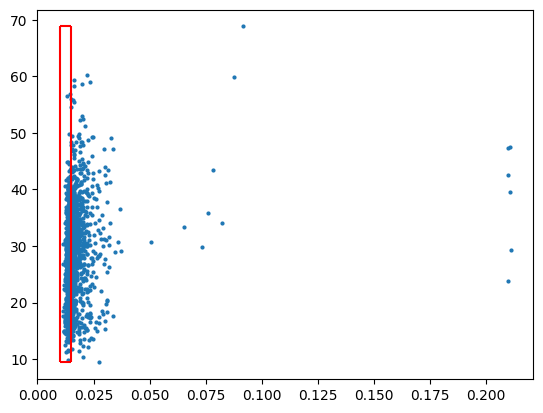

In [4]:
plt.scatter(error_list, speed_list, s=4)
plt.hlines(max(speed_list), 0.01, 0.015, color="r")
plt.hlines(min(speed_list), 0.01, 0.015, color="r")
plt.vlines(0.01, min(speed_list), max(speed_list), color="r")
plt.vlines(0.015, min(speed_list), max(speed_list), color="r")
plt.show()

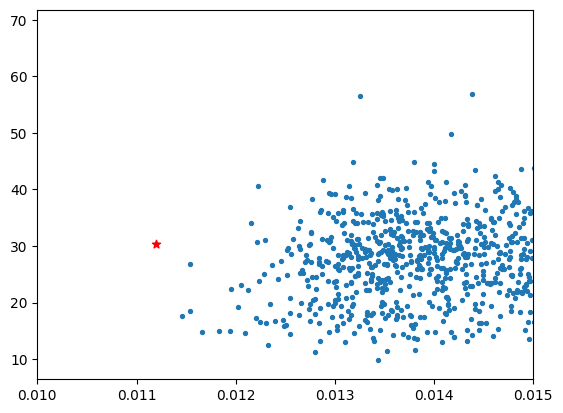

Arquitetura escolhida: epochs_500__batch_10000__arch_SiLU--4__LeakyReLU--16__


In [6]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 30), np.argwhere(np.array(error_list) < 0.0115)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01, 0.015)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

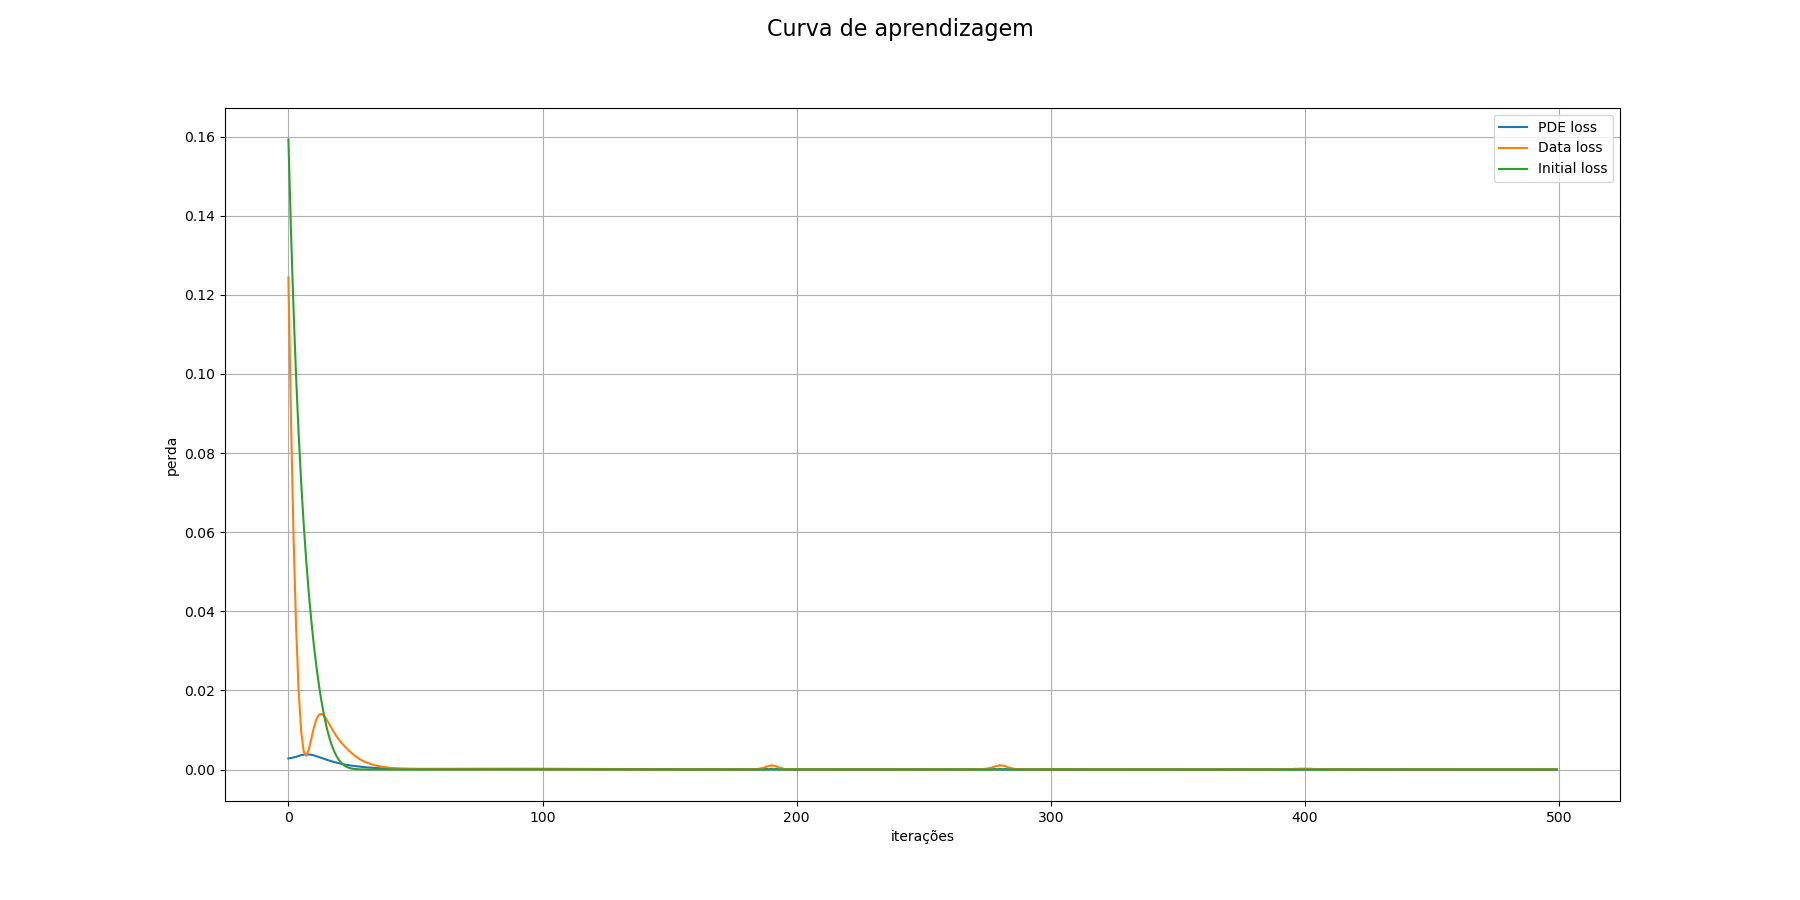

In [7]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

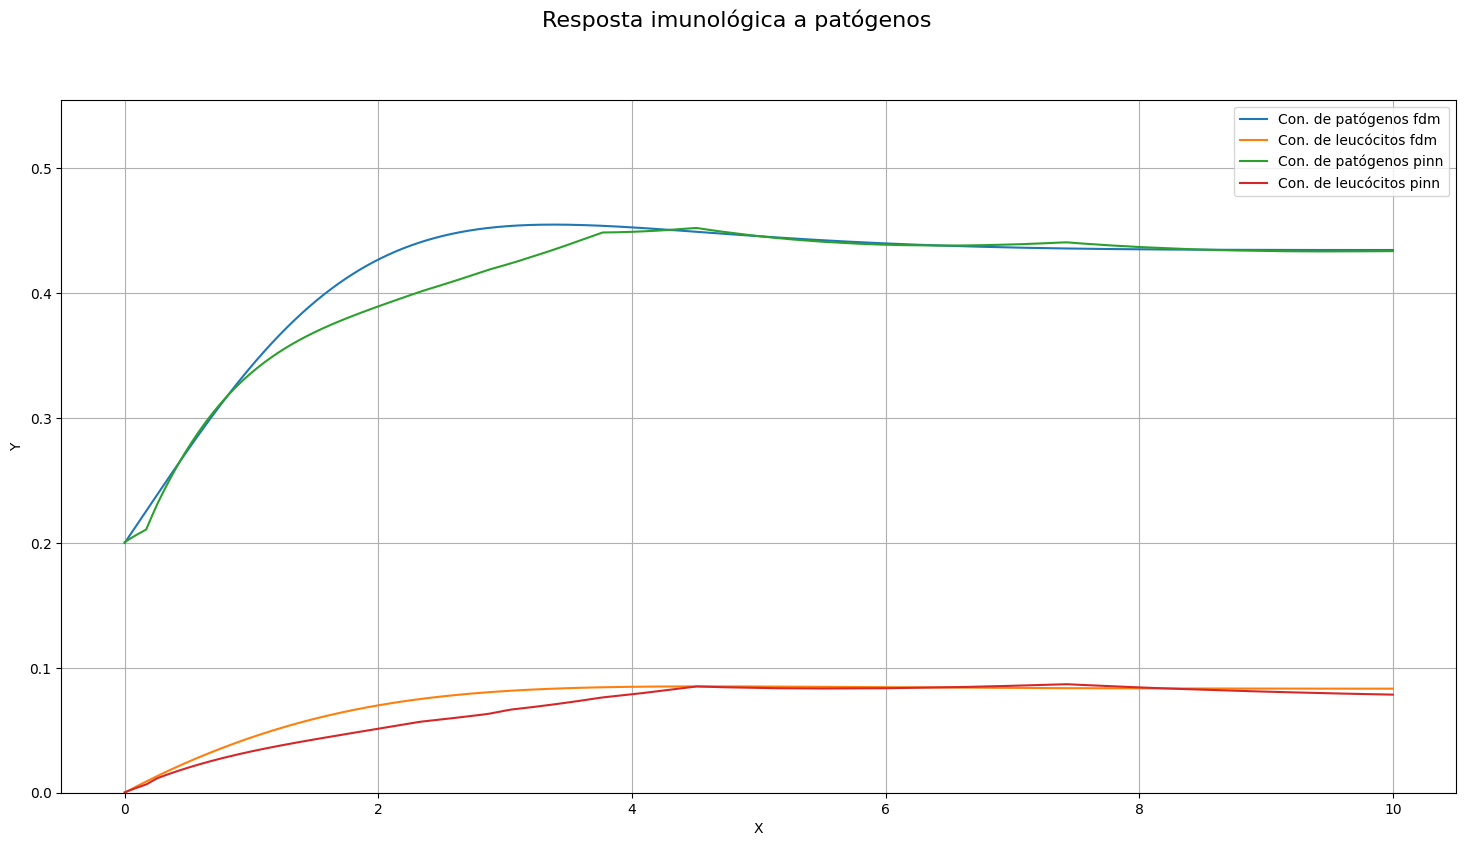

Speed Up: 35.49919790816351 +/-5.091434114909515


In [8]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cp_pinn, label="Con. de patógenos pinn")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl_pinn, label="Con. de leucócitos pinn")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

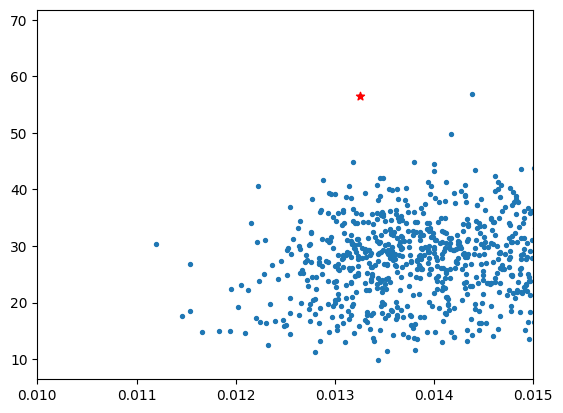

Arquitetura escolhida: epochs_1000__batch_5000__arch_Sigmoid--8__ReLU--16__


In [9]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 50), np.argwhere(np.array(error_list) < 0.014)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01, 0.015)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

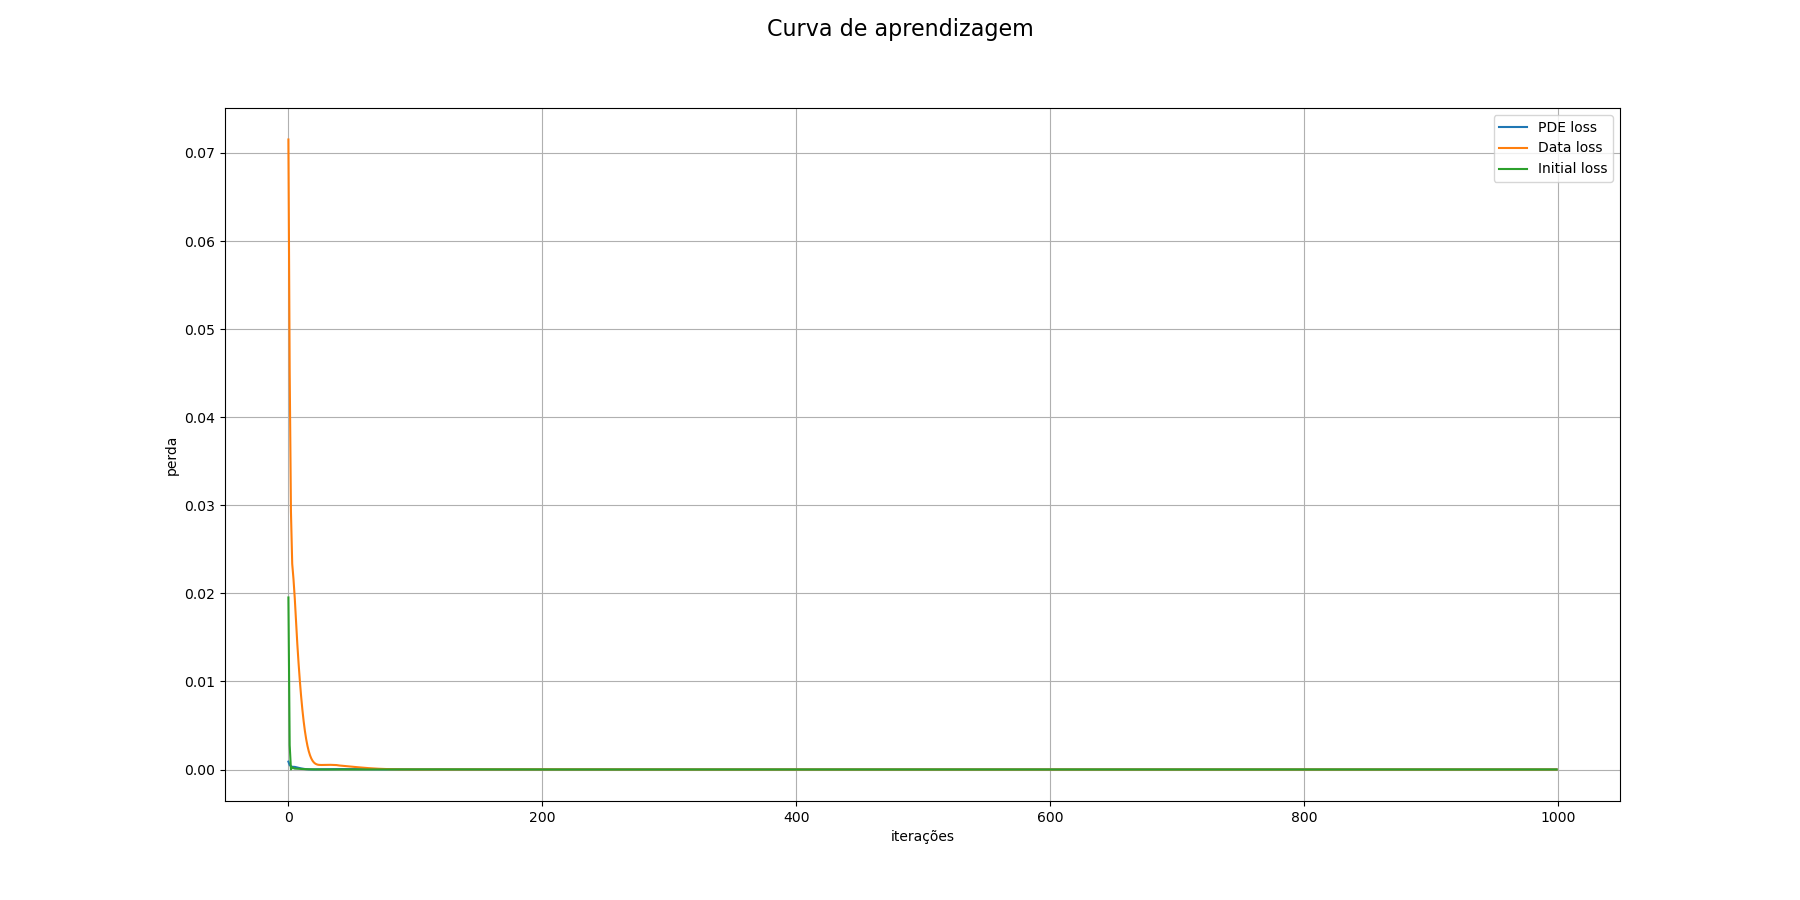

In [10]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

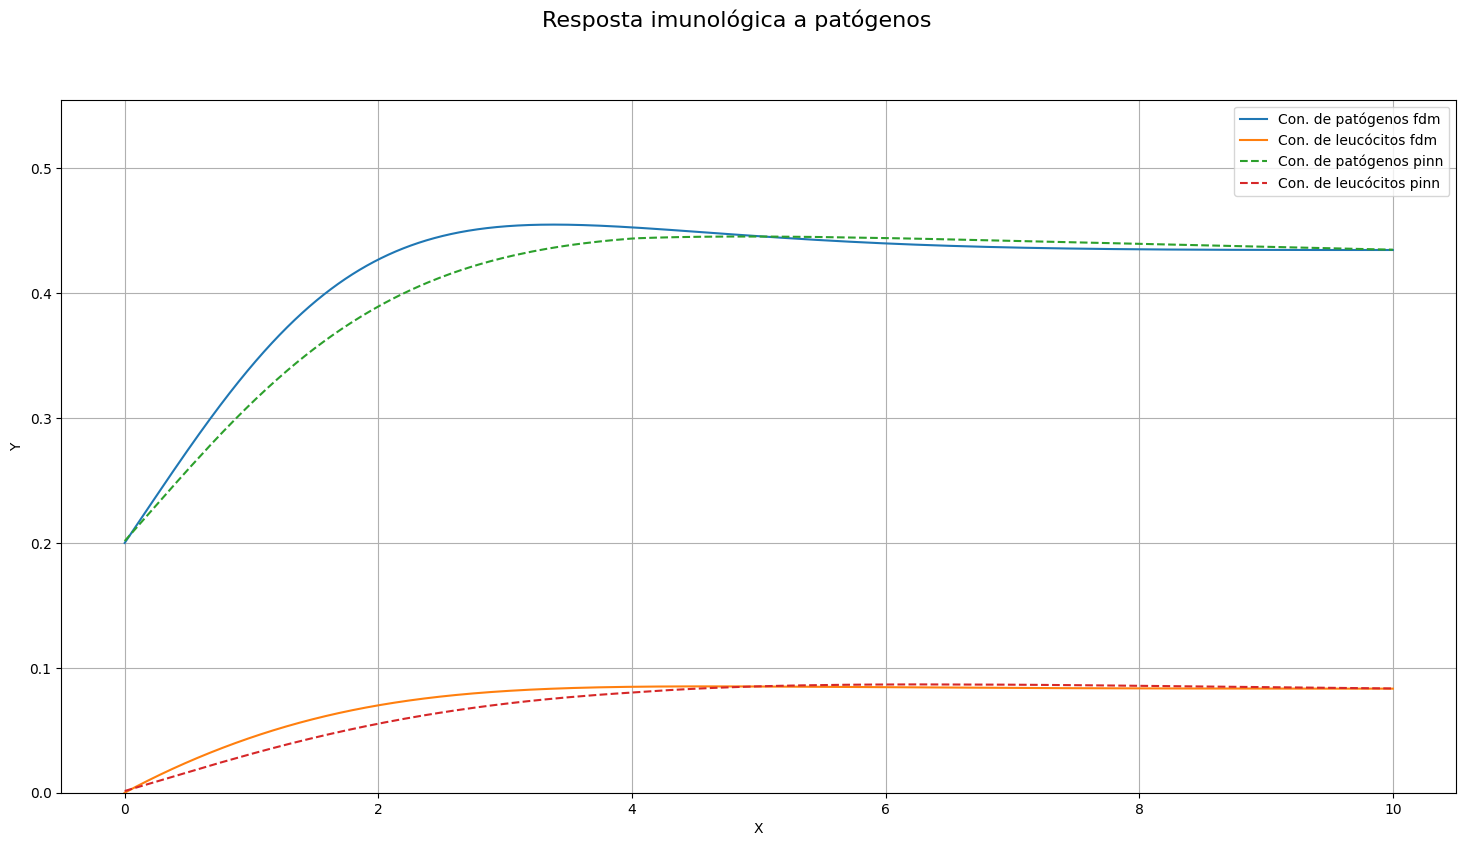

Speed Up: 76.14251676683703 +/-19.68065023034816


In [13]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

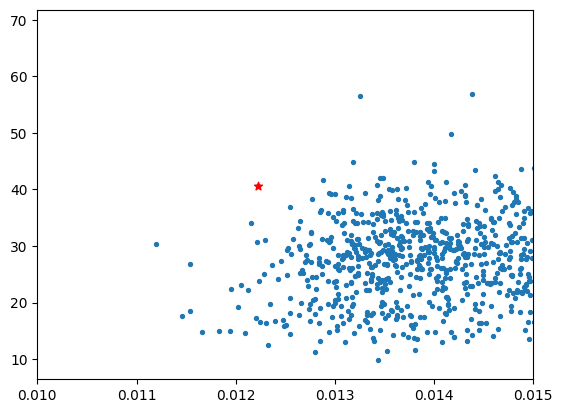

Arquitetura escolhida: epochs_500__batch_10000__arch_ReLU--8__SiLU--16__


In [14]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 40), np.argwhere(np.array(error_list) < 0.0125)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01, 0.015)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

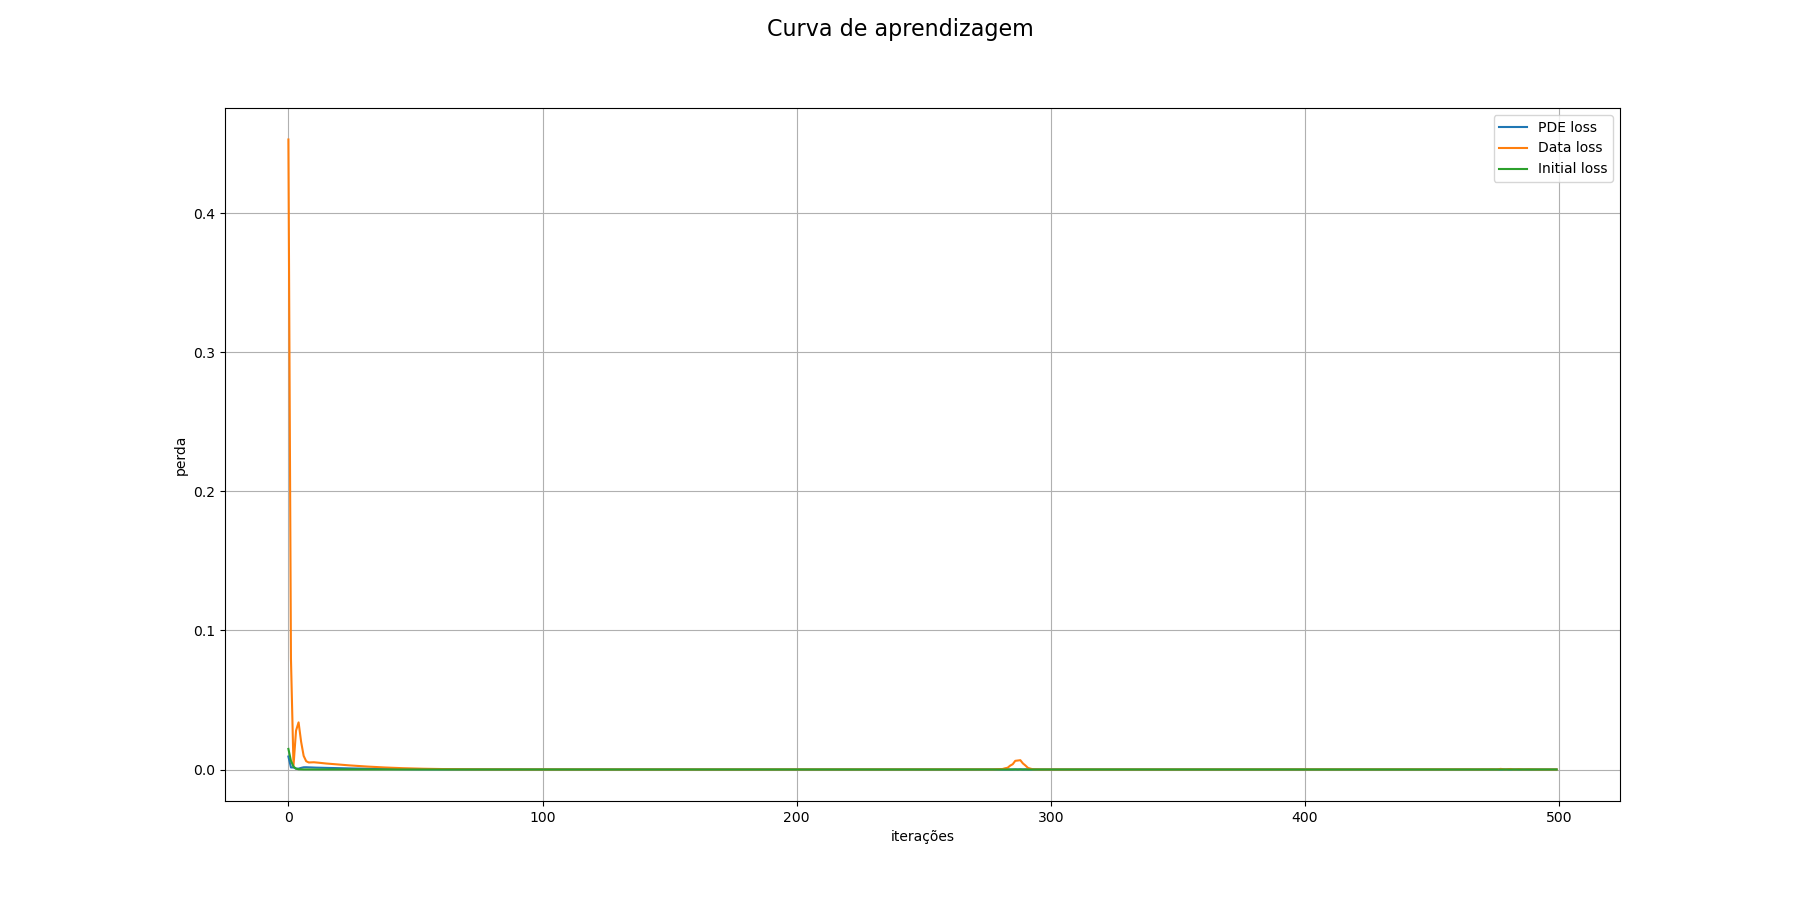

In [15]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

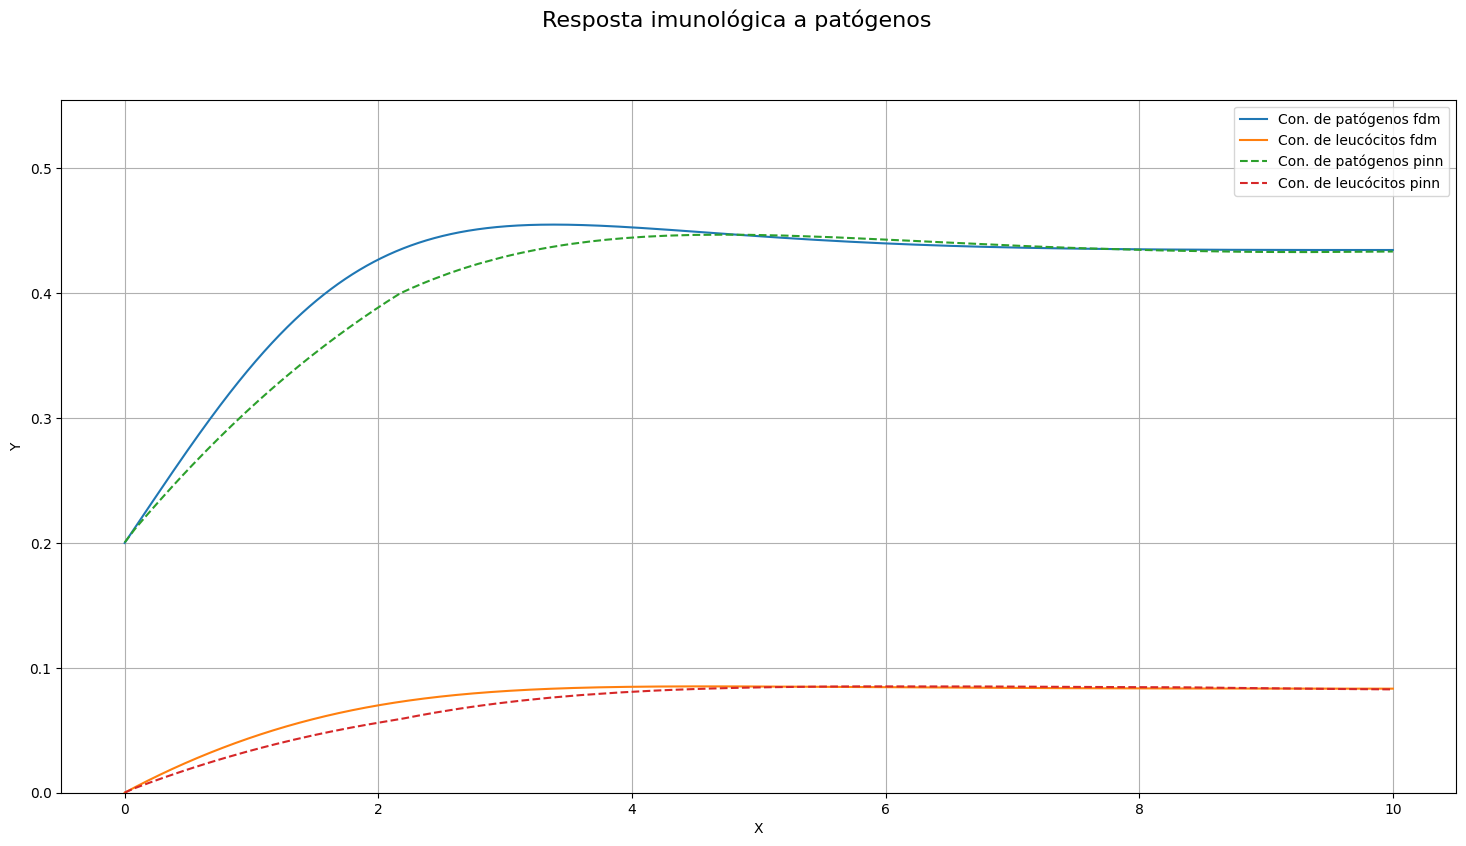

Speed Up: 48.80383271140607 +/-8.14660840147017


In [16]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

# 15/05/13 - Estudos de redes com até duas camadas e de 32 a 64 neurônios e peso na perda da condição inicial



## Resumo

- Função de perda: RMSE
- Parânmetros do modelo: k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0
- Funções de  ativação: 
    - LeakyReLU
    - Sigmoid
    - Elu 
    - Tanh
    - ReLU
    - SiLU

- Tamanhos de batelada e épocas:
    - (10000, 500)
    - (5000, 1000)

- Arquivo de checkpoint: 1715804653

- Peso da perda de cond. inicial: 10

In [1]:
import glob
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
result_list = glob.glob("edo_pinn_sim/*")

print("numero de arquiteturas testadas: {}".format(len(result_list)))

numero de arquiteturas testadas: 129


In [3]:
results_dict = {}

error_list = []

speed_list = []
tmp_list = []

for file in result_list:
    i = len(error_list)
    if file.split(".")[-1] == "pkl":
        with open(file, "rb") as f:
            results_dict[i] = pk.load(f)

        results_dict[i]["arch_name"] = file.split("/")[-1].split(".")[0]

        tmp_list.append(results_dict[i]["max_ae"])
        error_list.append(results_dict[i]["rmse"])
        speed_list.append(
            results_dict[i]["mean_speed_up"] - results_dict[i]["std_speed_up"]
        )

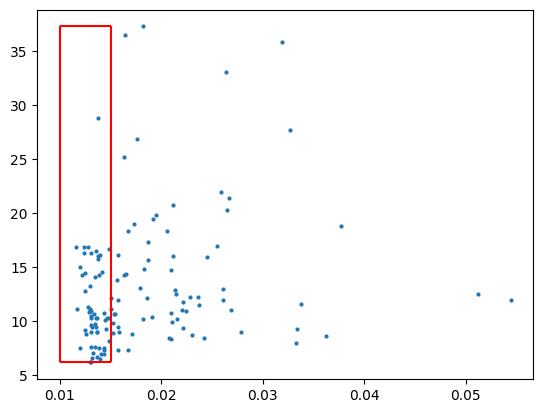

In [4]:
plt.scatter(error_list, speed_list, s=4)
plt.hlines(max(speed_list), 0.01, 0.015, color="r")
plt.hlines(min(speed_list), 0.01, 0.015, color="r")
plt.vlines(0.01, min(speed_list), max(speed_list), color="r")
plt.vlines(0.015, min(speed_list), max(speed_list), color="r")
plt.show()

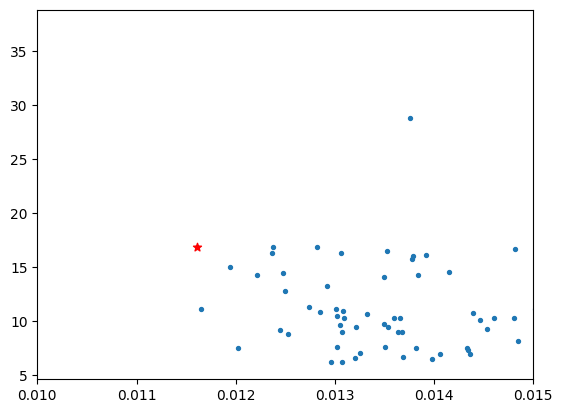

Arquitetura escolhida: epochs_1000__batch_5000__arch_SiLU--32__ReLU--32__


In [9]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 15), np.argwhere(np.array(error_list) < 0.0119)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01, 0.015)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)
print("Arquitetura escolhida: " + arch_str)

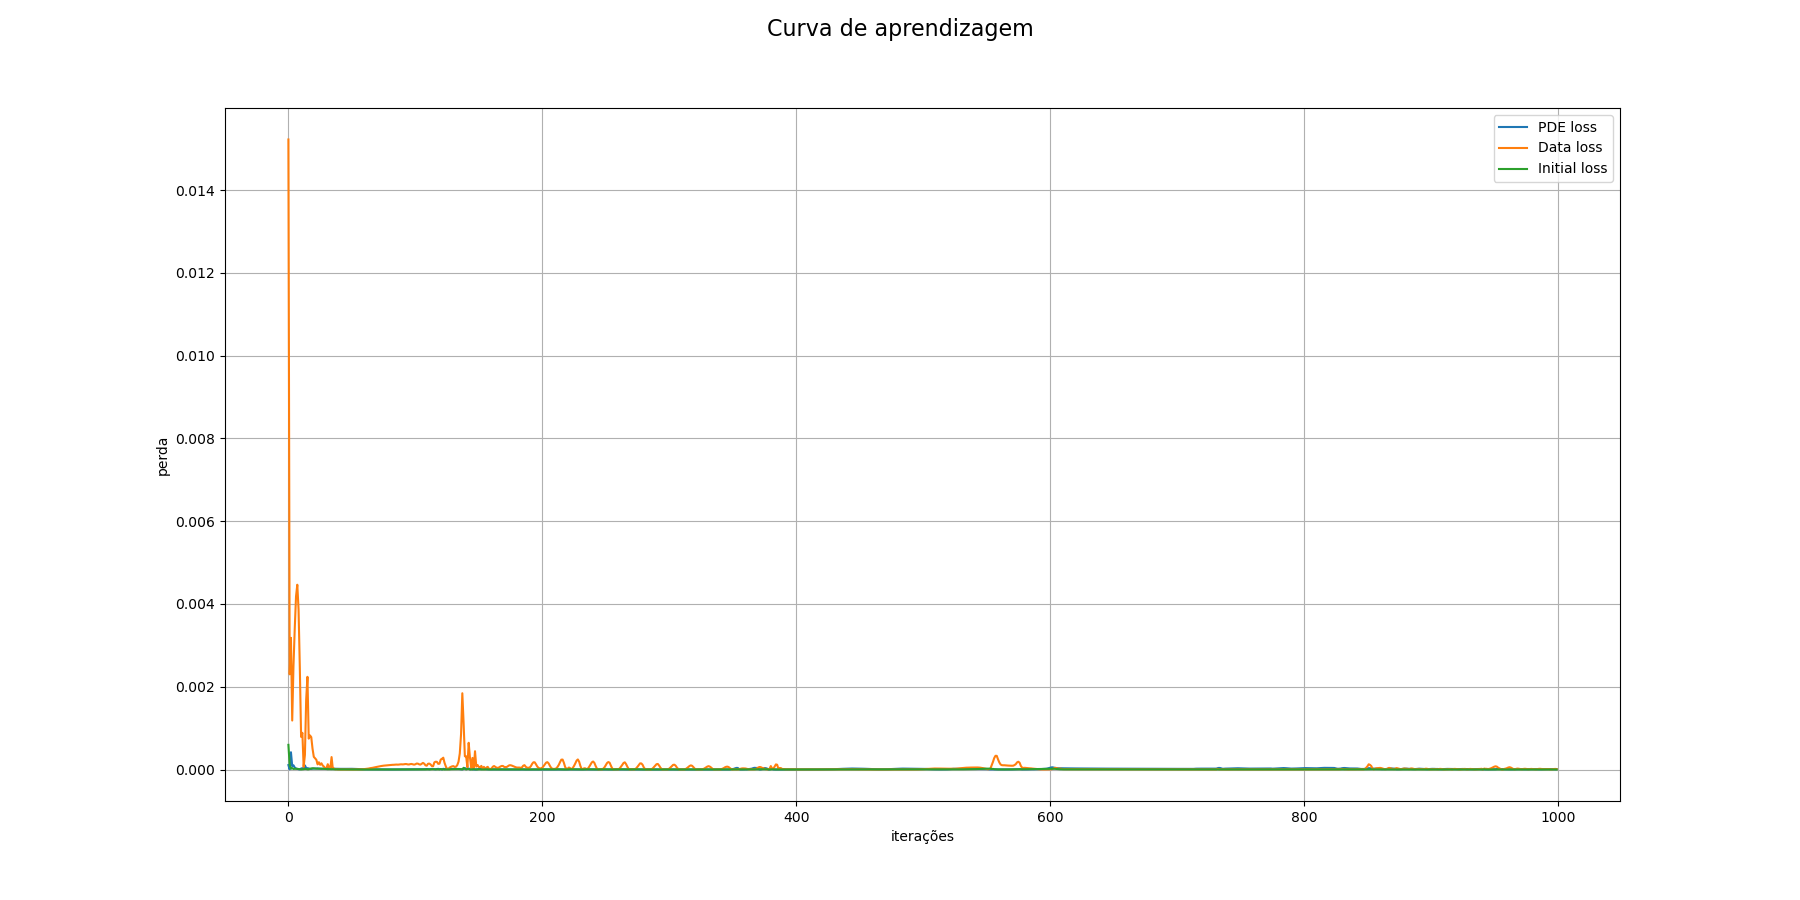

In [10]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

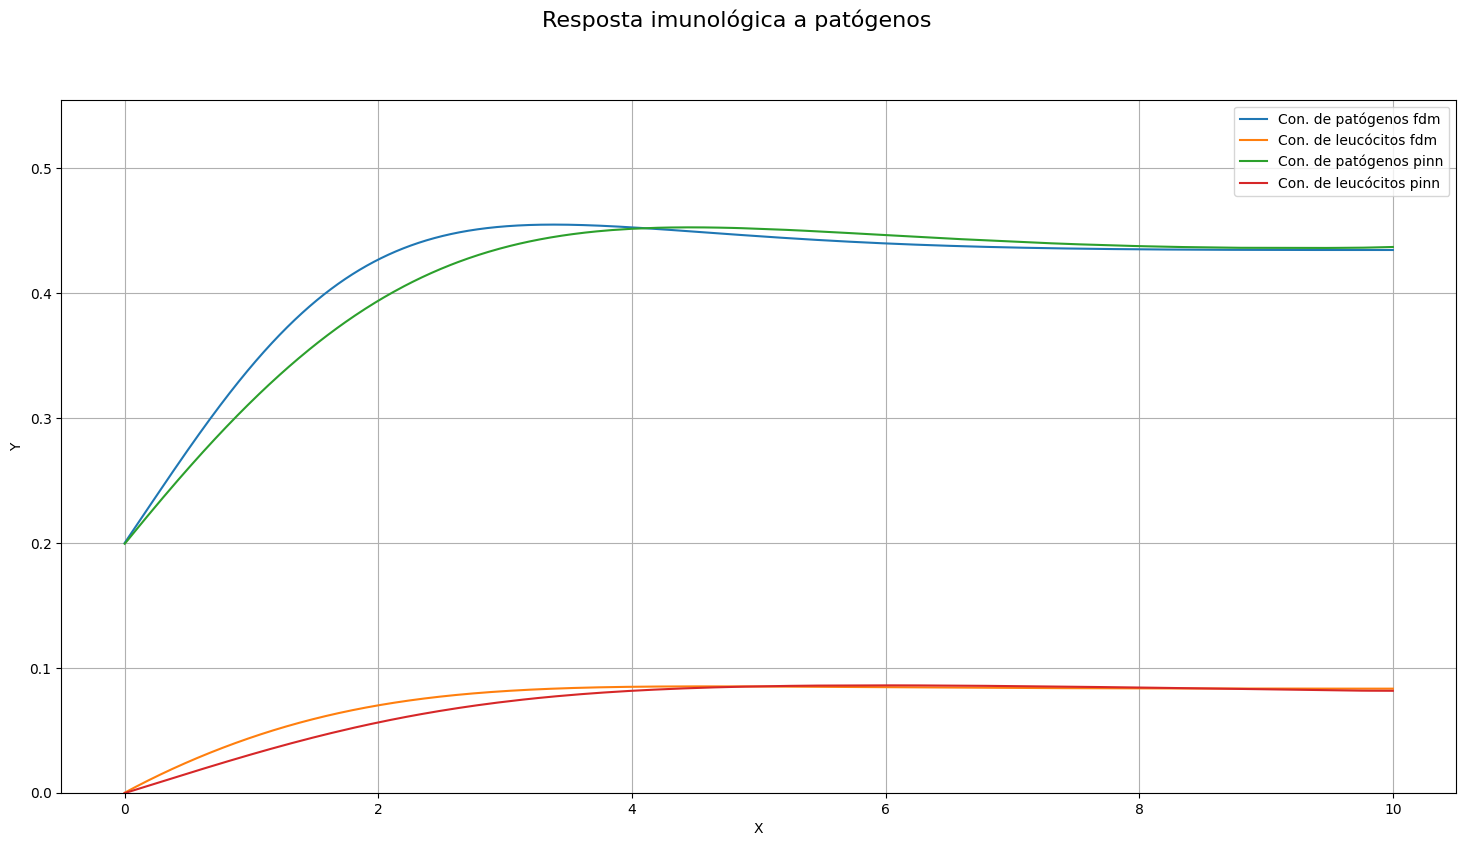

Speed Up: 18.67314734084313 +/-1.7554362384949616


In [11]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cp_pinn, label="Con. de patógenos pinn")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl_pinn, label="Con. de leucócitos pinn")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

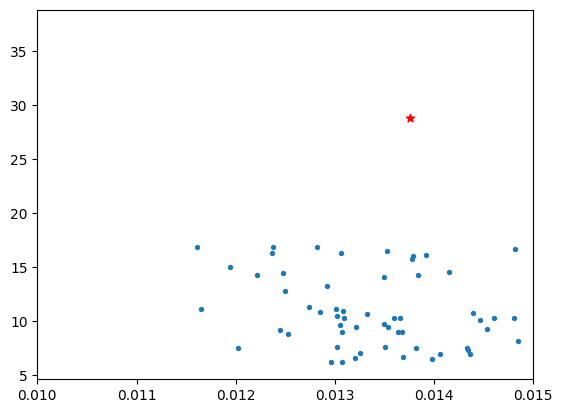

Arquitetura escolhida: epochs_1000__batch_5000__arch_Sigmoid--32__


In [13]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 25), np.argwhere(np.array(error_list) < 0.014)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01, 0.015)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

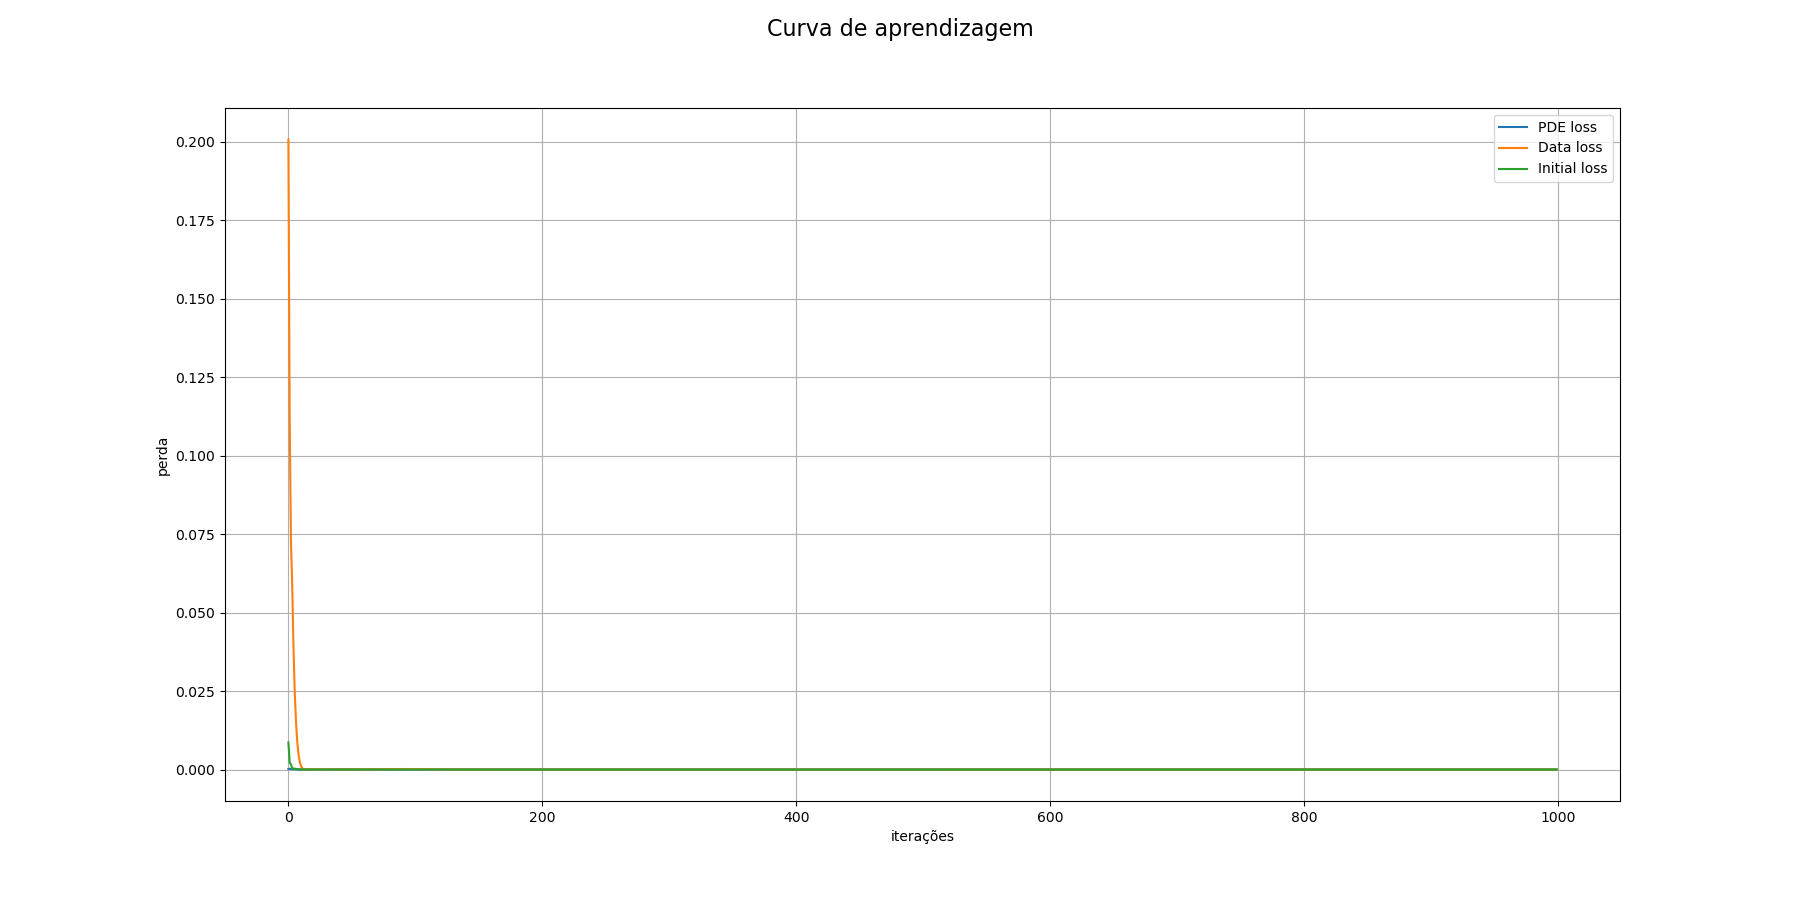

In [14]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

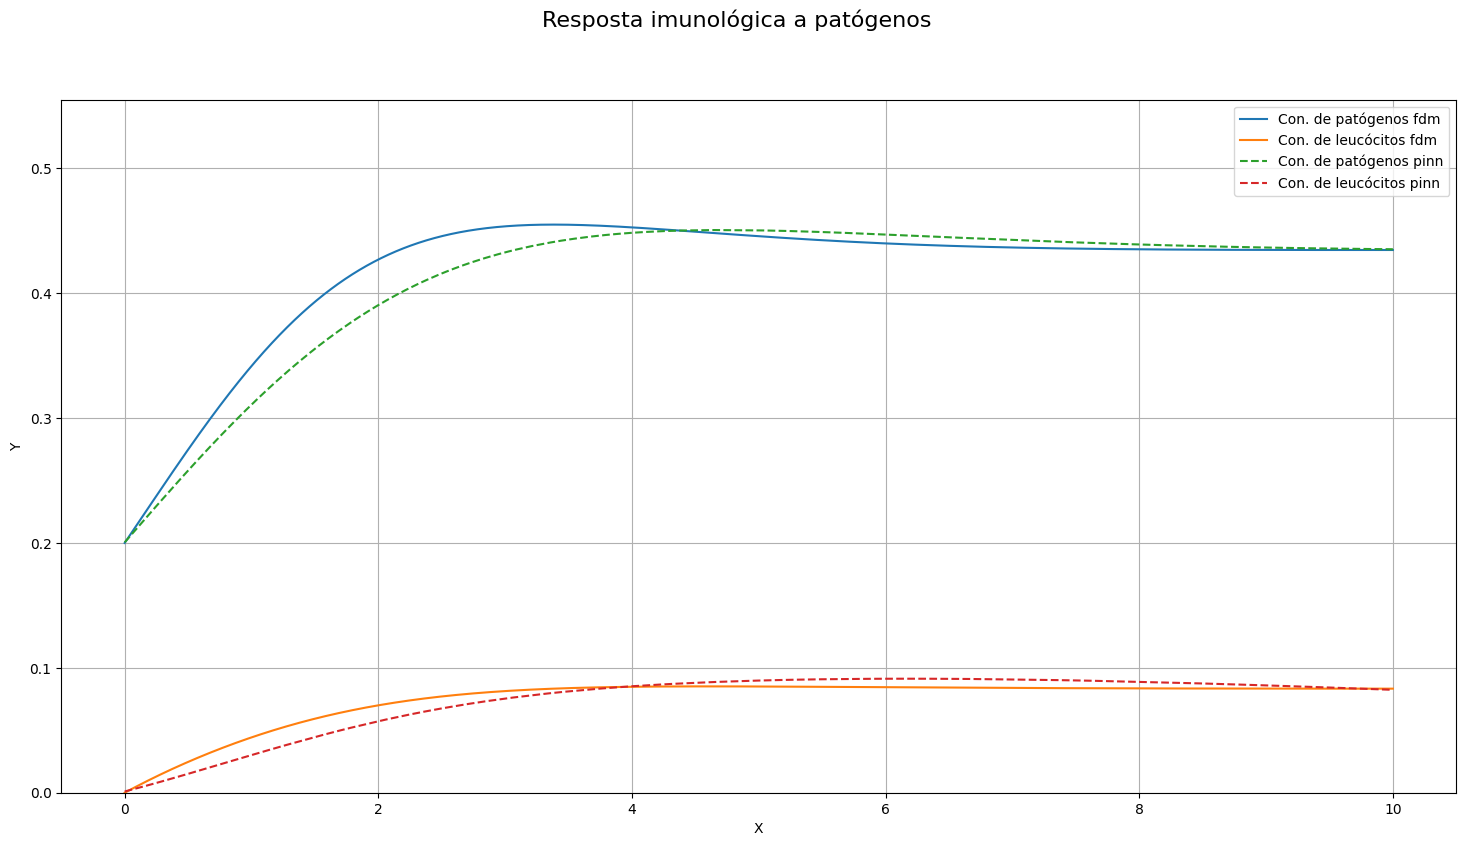

Speed Up: 33.12684759024816 +/-4.306022438320334


In [15]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

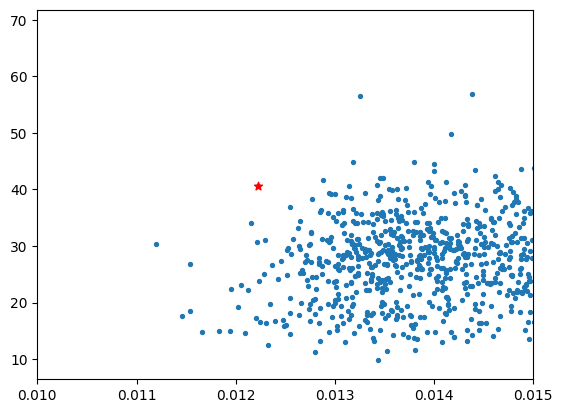

Arquitetura escolhida: epochs_500__batch_10000__arch_ReLU--8__SiLU--16__


In [ ]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 40), np.argwhere(np.array(error_list) < 0.0125)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.01, 0.015)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

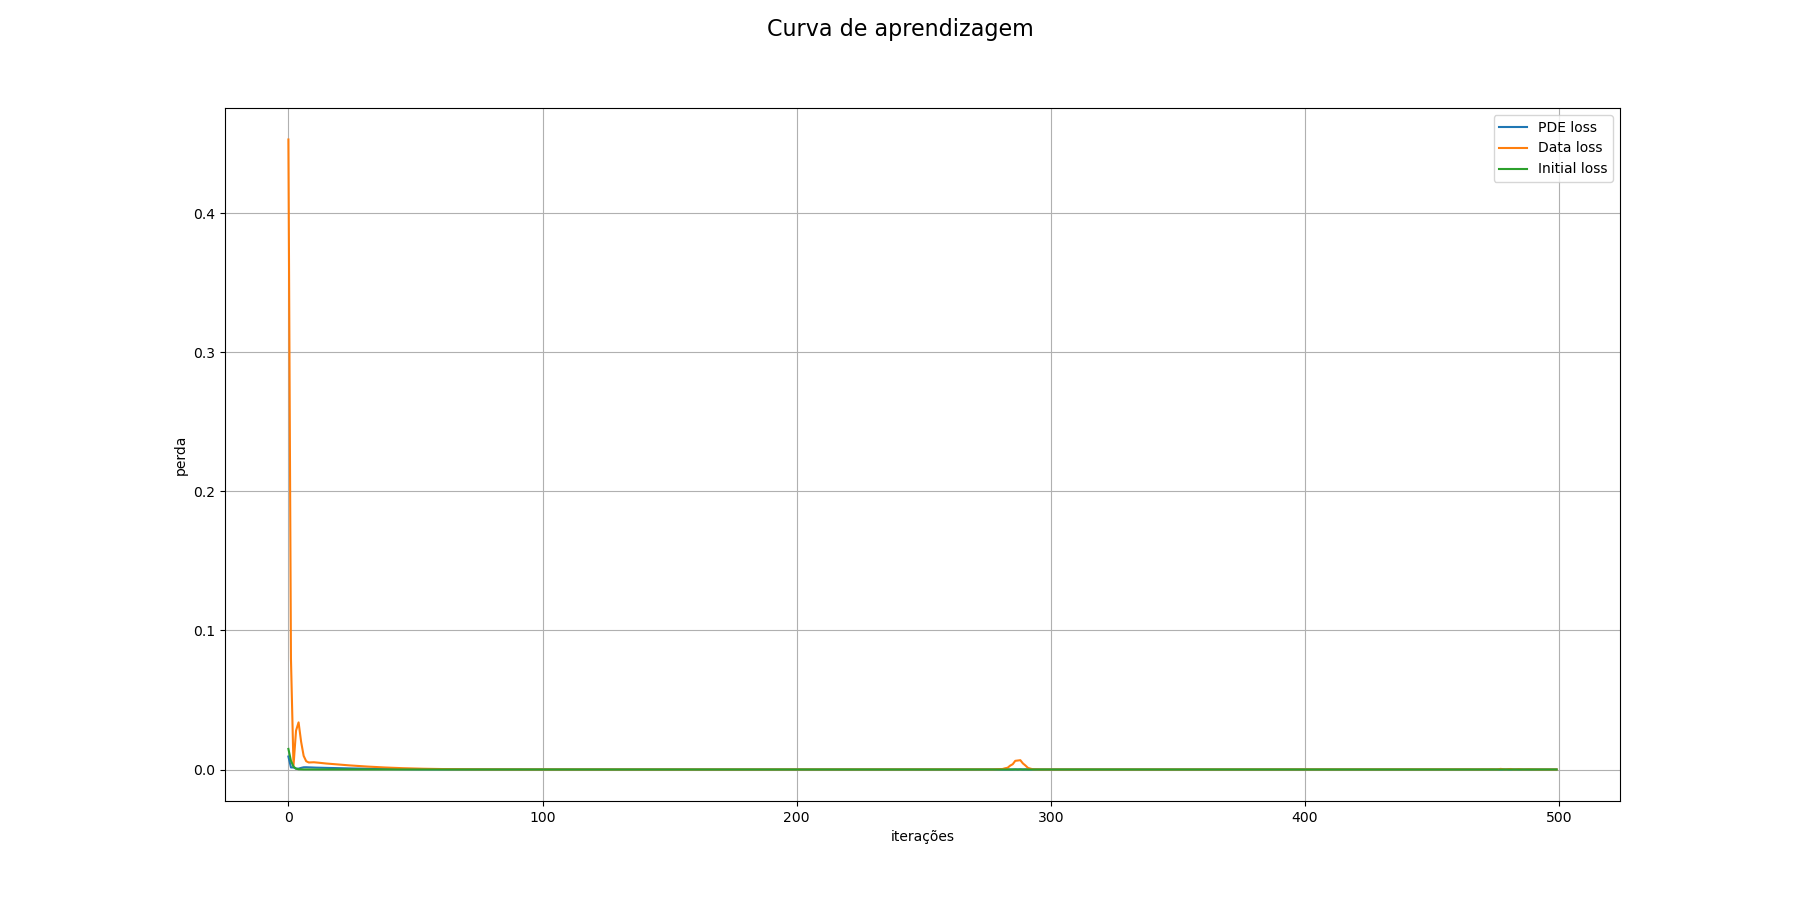

In [ ]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

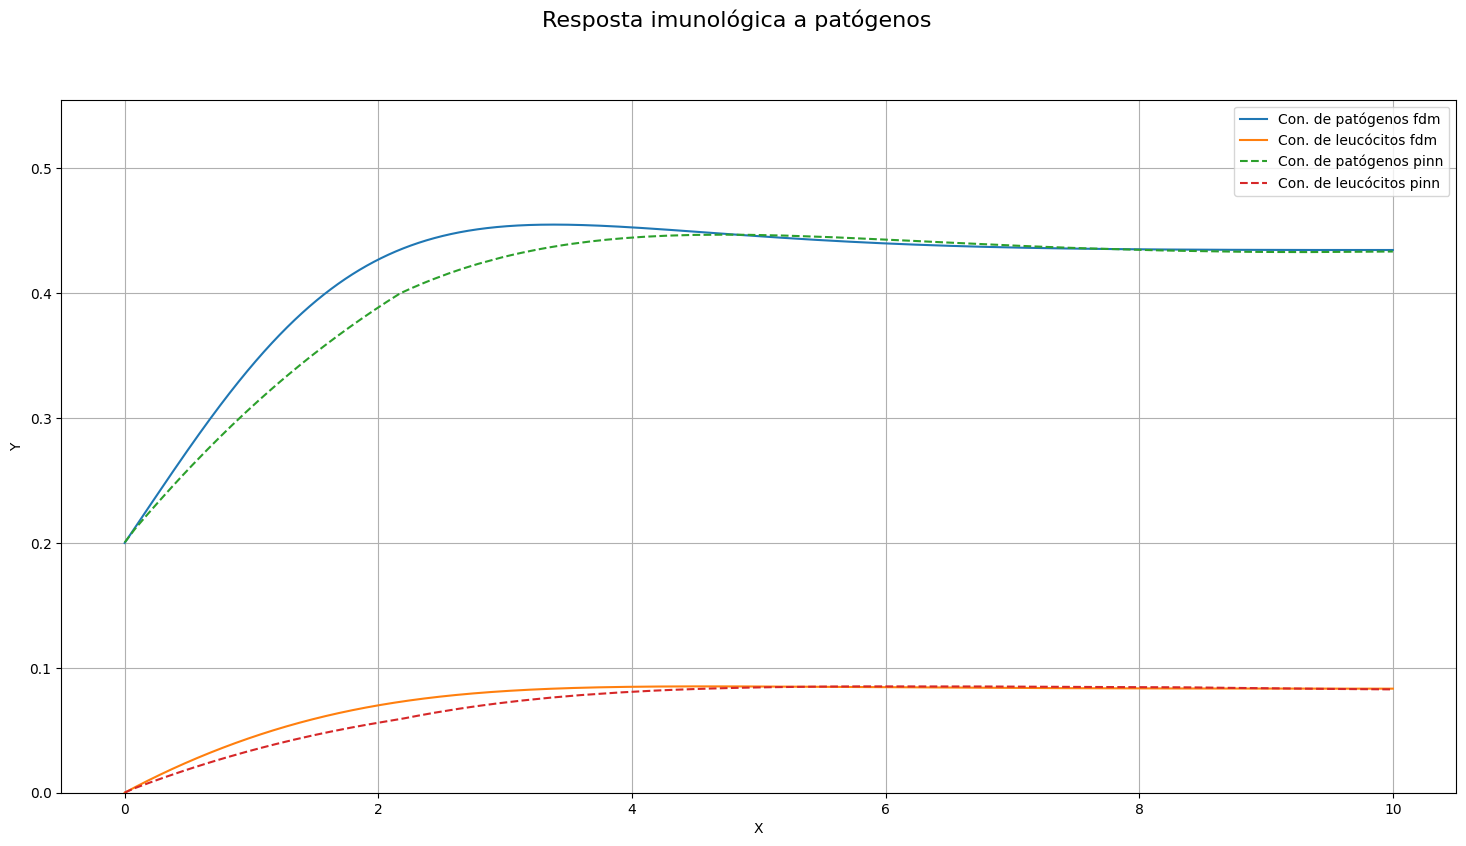

Speed Up: 48.80383271140607 +/-8.14660840147017


In [ ]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

# 20/05/13 - Estudos de redes com até duas camadas e de 4 a 32 neurônios e peso na perda da condição inicial e dados



## Resumo

- Função de perda: RMSE
- Parânmetros do modelo: k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0
- Funções de  ativação: 
    - LeakyReLU
    - Sigmoid
    - Elu 
    - Tanh
    - ReLU
    - SiLU

- Tamanhos de batelada e épocas:
    - (10000, 500)
    - (5000, 1000)

- Arquivo de checkpoint: 1716221142

- Peso da perda de cond. inicial: 10

- Peso da perda de dados: 10

In [1]:
import glob
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

In [2]:
result_list = glob.glob("edo_pinn_sim/*")

print("numero de arquiteturas testadas: {}".format(len(result_list)))

numero de arquiteturas testadas: 1186


In [3]:
results_dict = {}

error_list = []

speed_list = []
tmp_list = []

for file in result_list:
    i = len(error_list)
    if file.split(".")[-1] == "pkl":
        with open(file, "rb") as f:
            results_dict[i] = pk.load(f)

        results_dict[i]["arch_name"] = file.split("/")[-1].split(".")[0]

        tmp_list.append(results_dict[i]["max_ae"])
        error_list.append(results_dict[i]["rmse"])
        speed_list.append(
            results_dict[i]["mean_speed_up"] - results_dict[i]["std_speed_up"]
        )

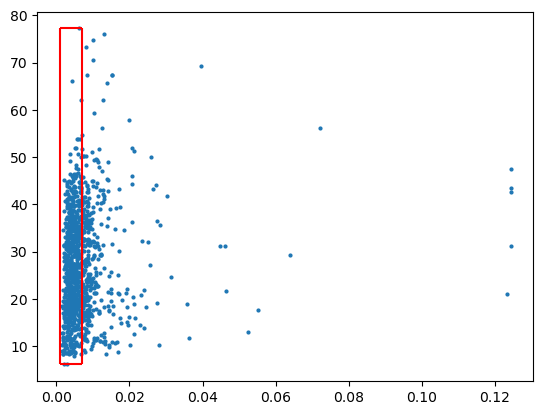

In [9]:
plt.scatter(error_list, speed_list, s=4)
plt.hlines(max(speed_list), 0.001, 0.007, color="r")
plt.hlines(min(speed_list), 0.001, 0.007, color="r")
plt.vlines(0.007, min(speed_list), max(speed_list), color="r")
plt.vlines(0.001, min(speed_list), max(speed_list), color="r")
plt.show()

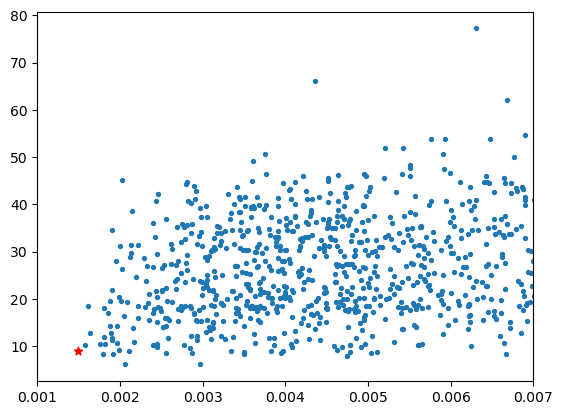

Arquitetura escolhida: epochs_500__batch_10000__arch_Tanh--32__SiLU--16__
Arquitetura escolhida: epochs_500__batch_10000__arch_Tanh--32__SiLU--16__


In [10]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) < 10), np.argwhere(np.array(error_list) < 0.0015)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.001, 0.007)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

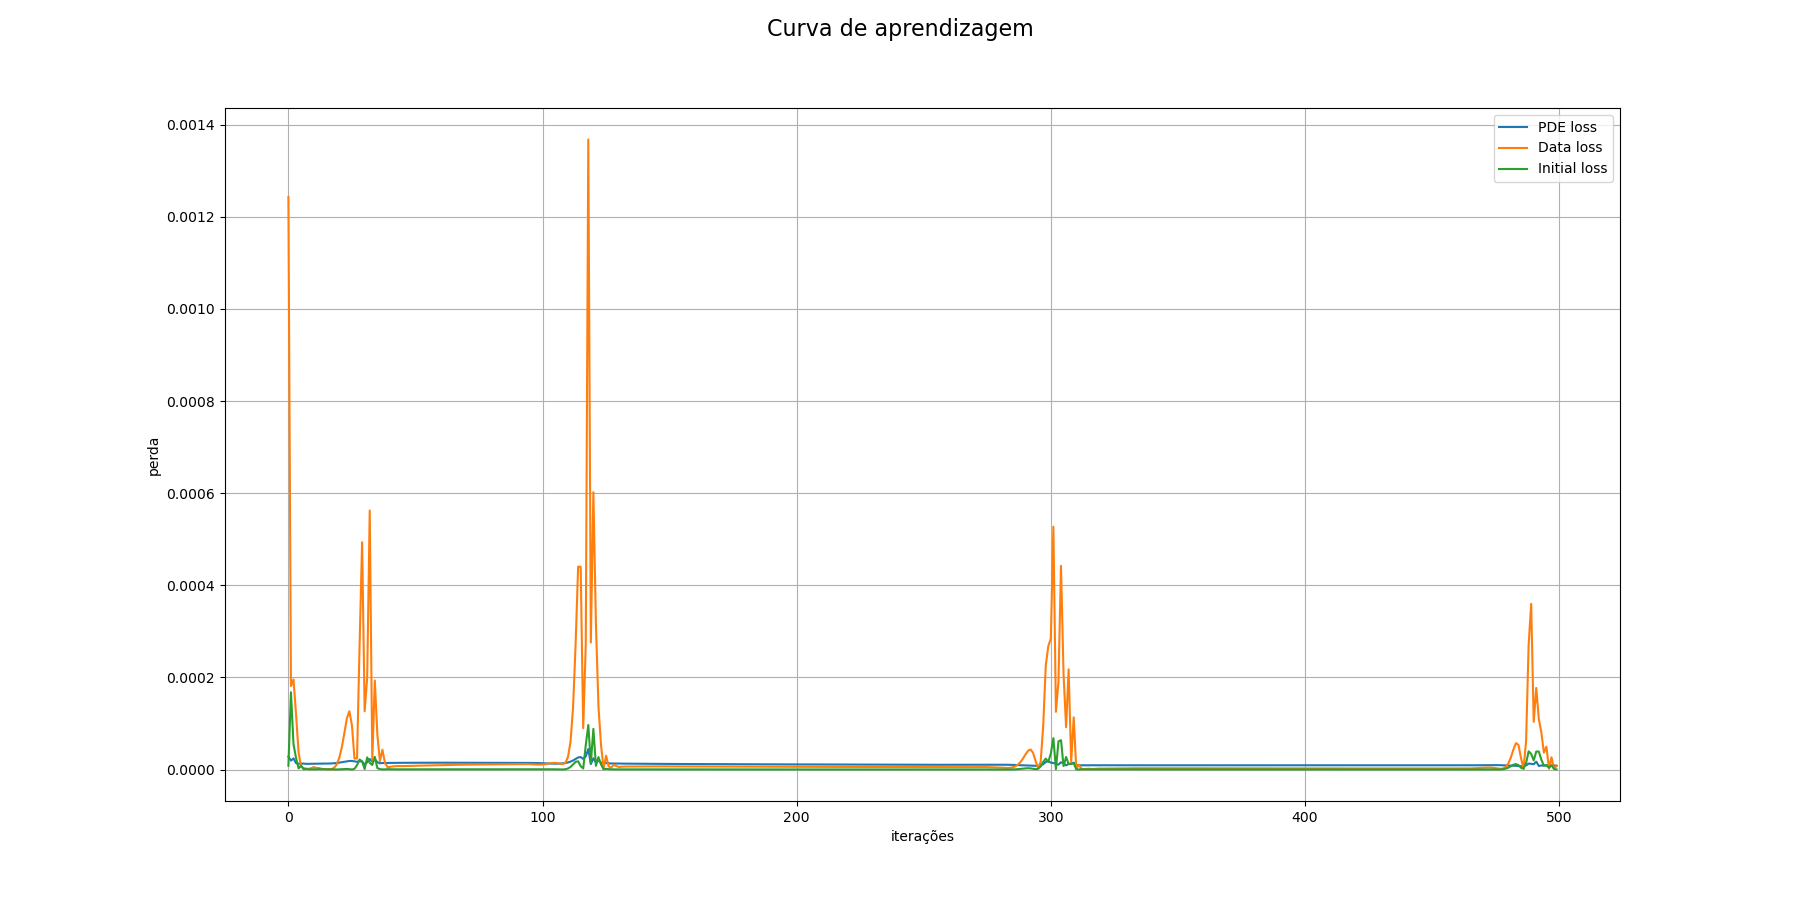

In [11]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

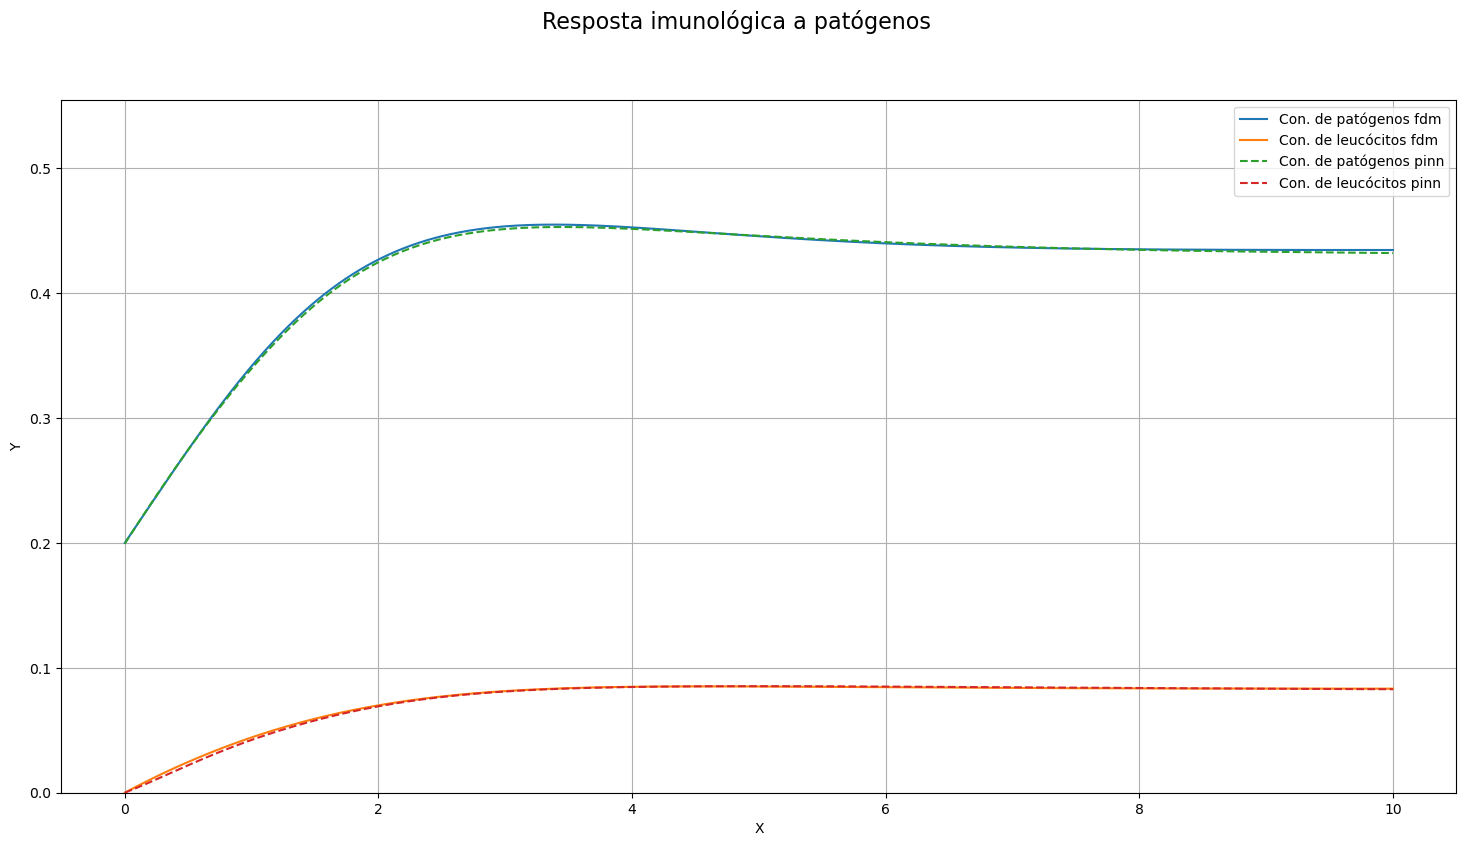

Speed Up: 10.651311900374562 +/-1.7251652099180557


In [13]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

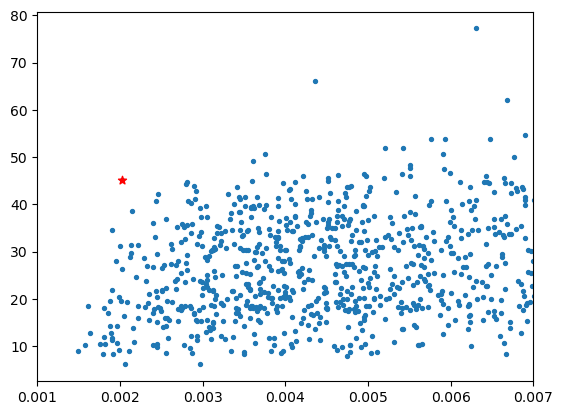

Arquitetura escolhida: epochs_500__batch_10000__arch_SiLU--8__LeakyReLU--4__


In [14]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 43), np.argwhere(np.array(error_list) < 0.0022)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.001, 0.007)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

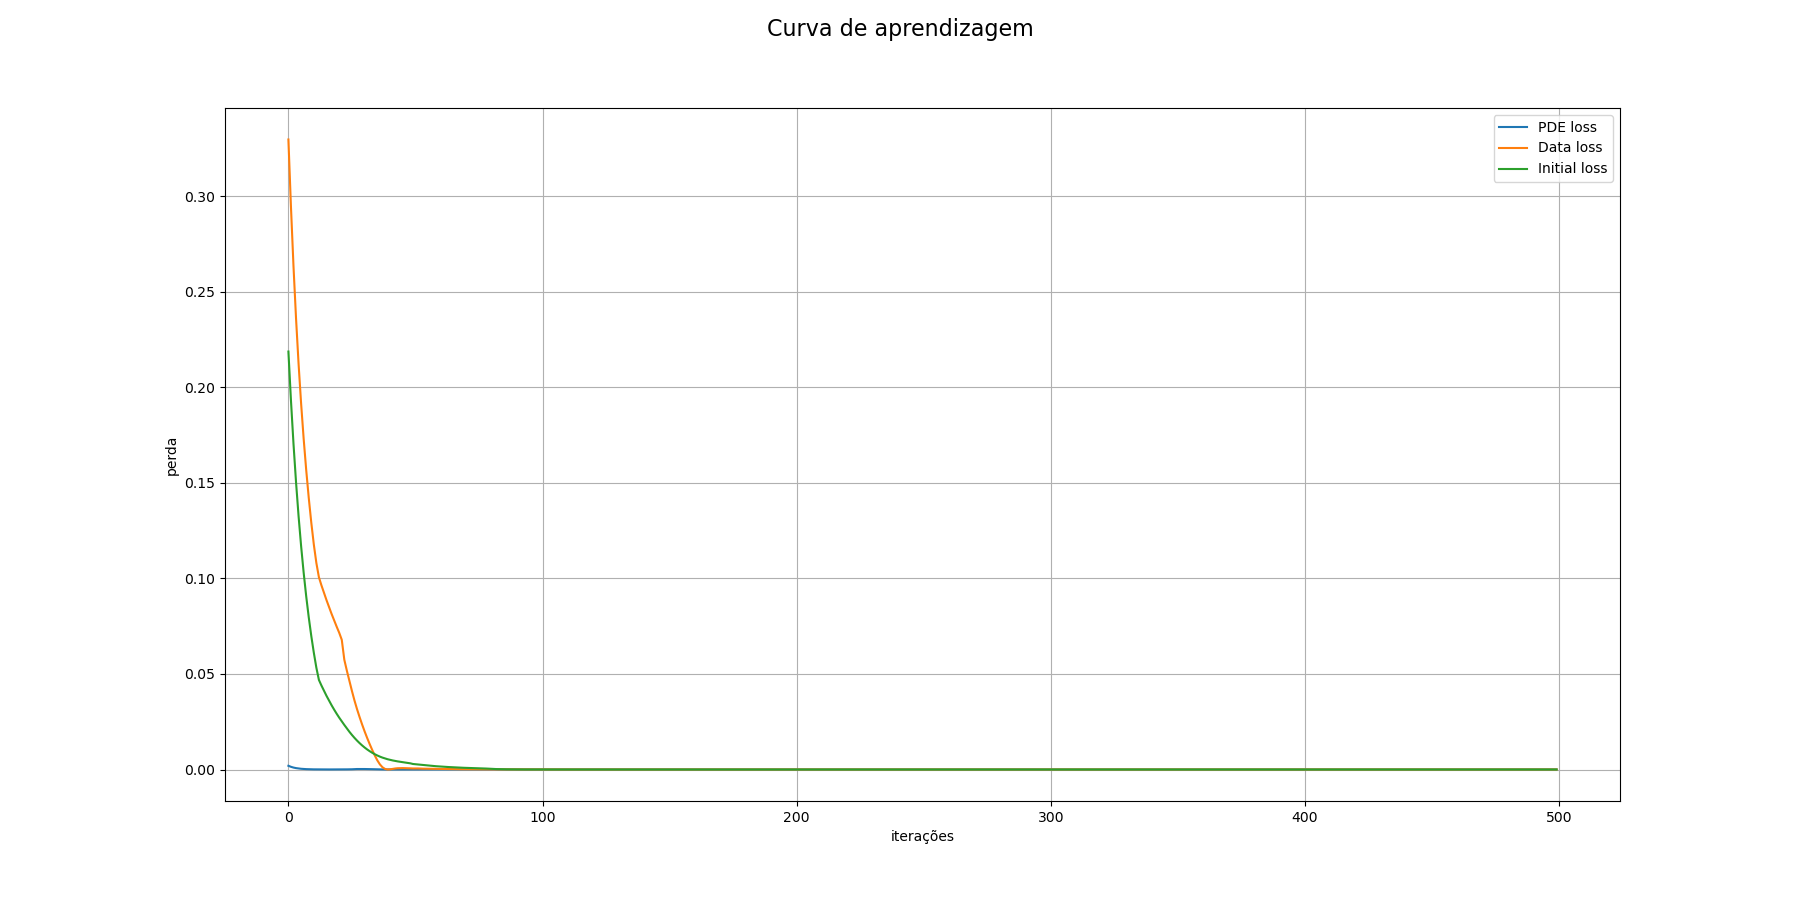

In [15]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

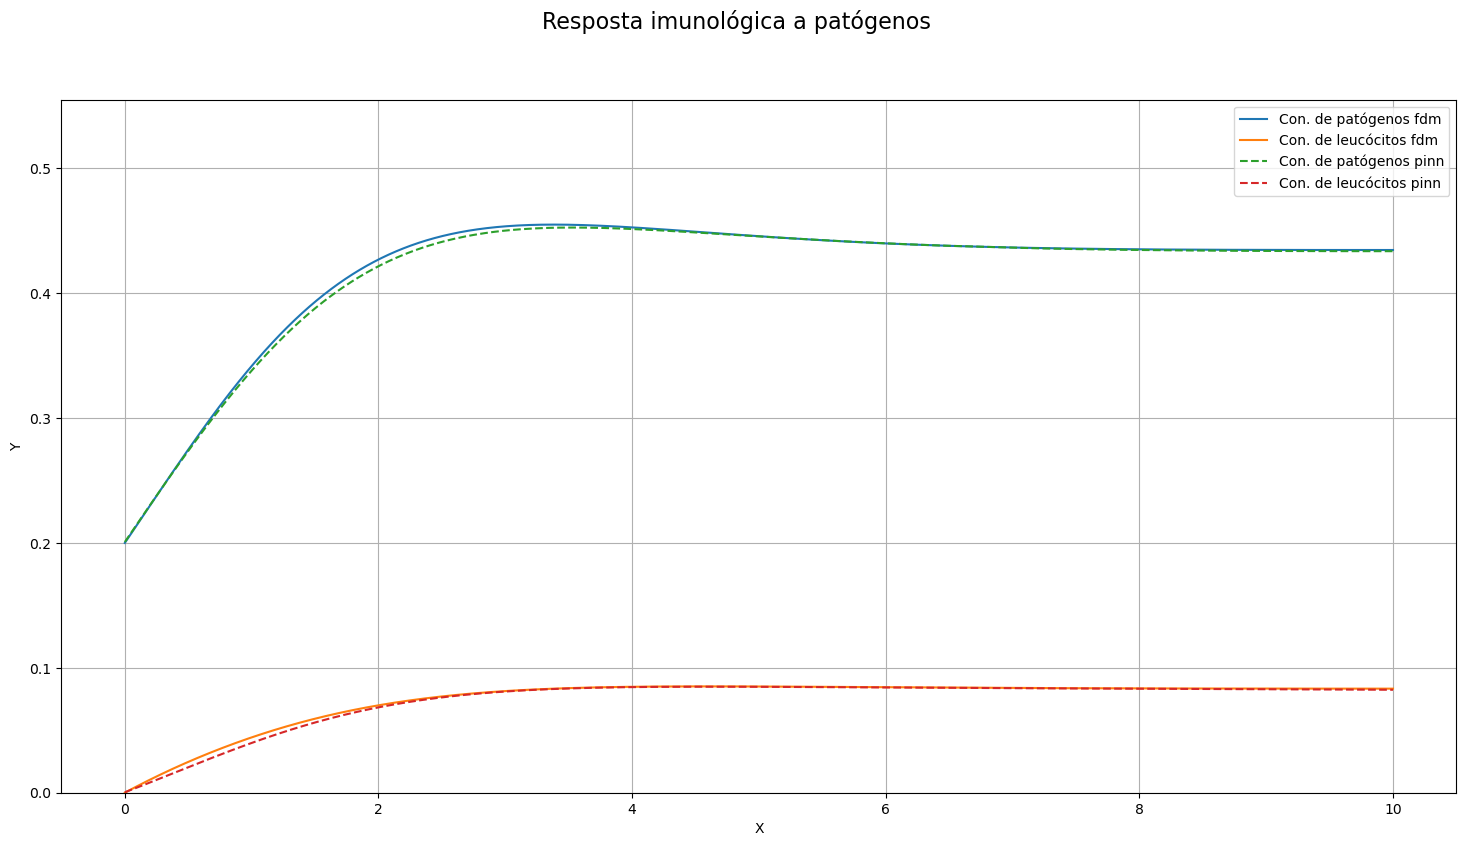

Speed Up: 46.395262507635955 +/-1.3004057028801246


In [16]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

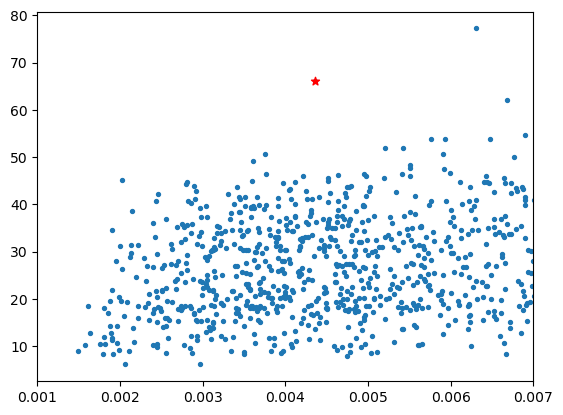

Arquitetura escolhida: epochs_500__batch_10000__arch_Sigmoid--8__


In [17]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 60), np.argwhere(np.array(error_list) < 0.005)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.001, 0.007)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

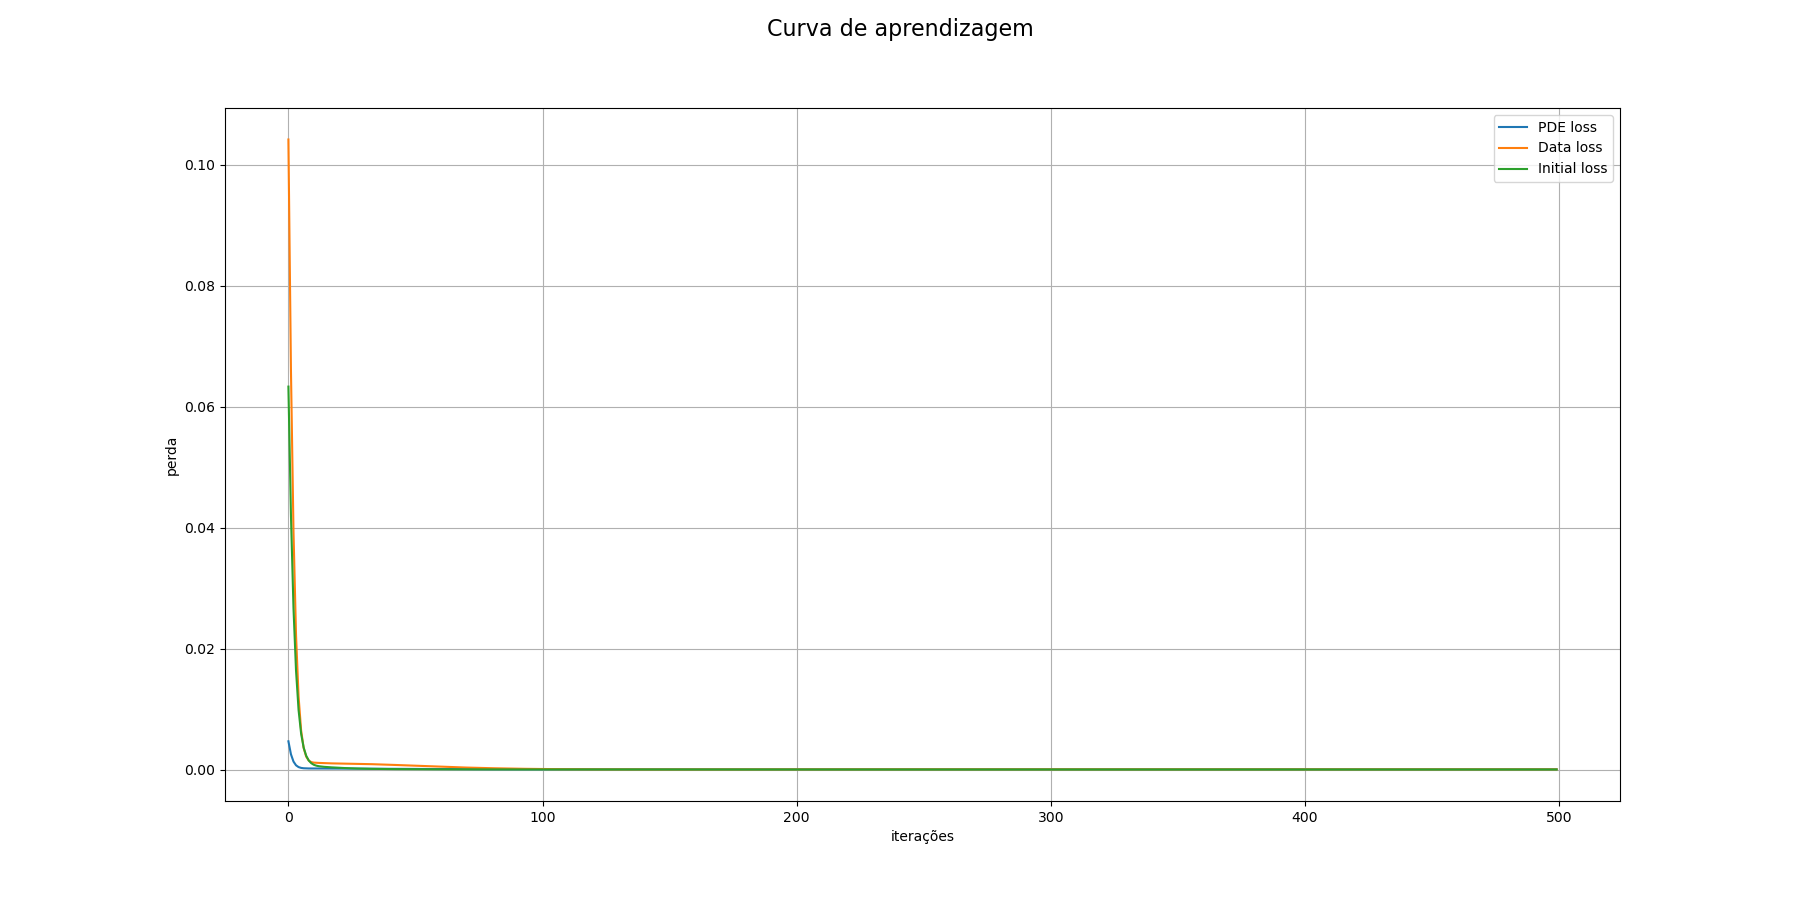

In [18]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

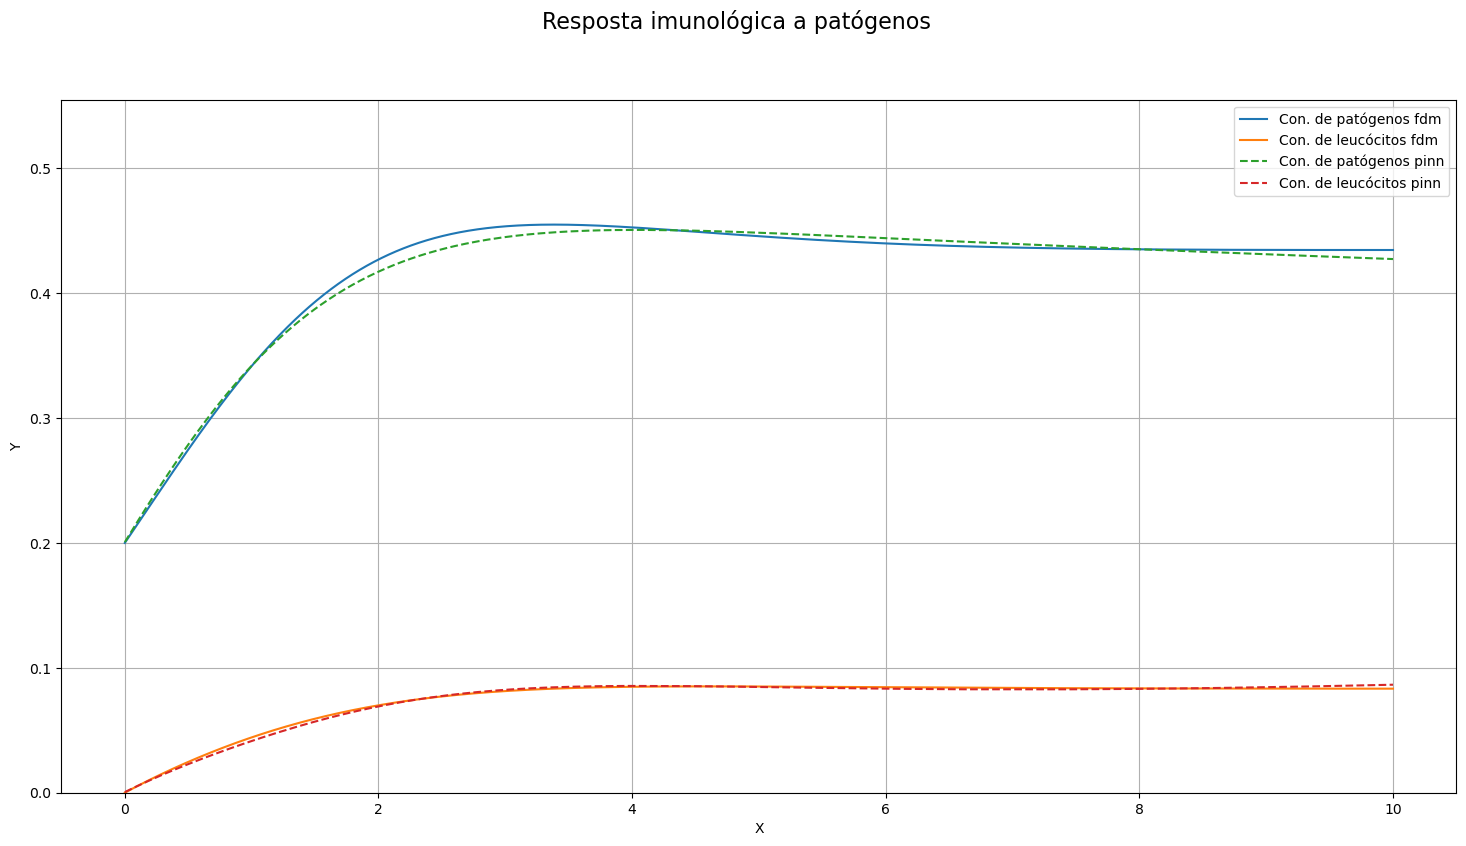

Speed Up: 71.72902047527438 +/-5.64650880588659


In [19]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)

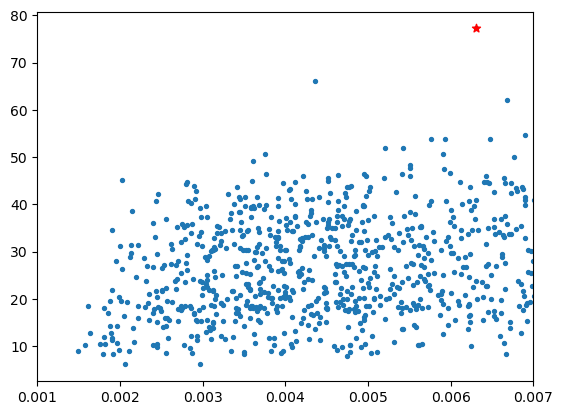

Arquitetura escolhida: epochs_500__batch_10000__arch_Sigmoid--4__


In [20]:
choice = np.intersect1d(
    np.argwhere(np.array(speed_list) > 70), np.argwhere(np.array(error_list) < 0.007)
)[0]

plt.scatter(error_list, speed_list, s=8)
plt.scatter(error_list[choice], speed_list[choice], c="r", marker="*")
# plt.hlines(25,0.01,0.15)
# plt.vlines(0.0108,min(speed_list),max(speed_list))
plt.xlim(0.001, 0.007)
plt.ylim()
plt.show()

arch_str = results_dict[choice]["arch_name"]

print("Arquitetura escolhida: " + arch_str)

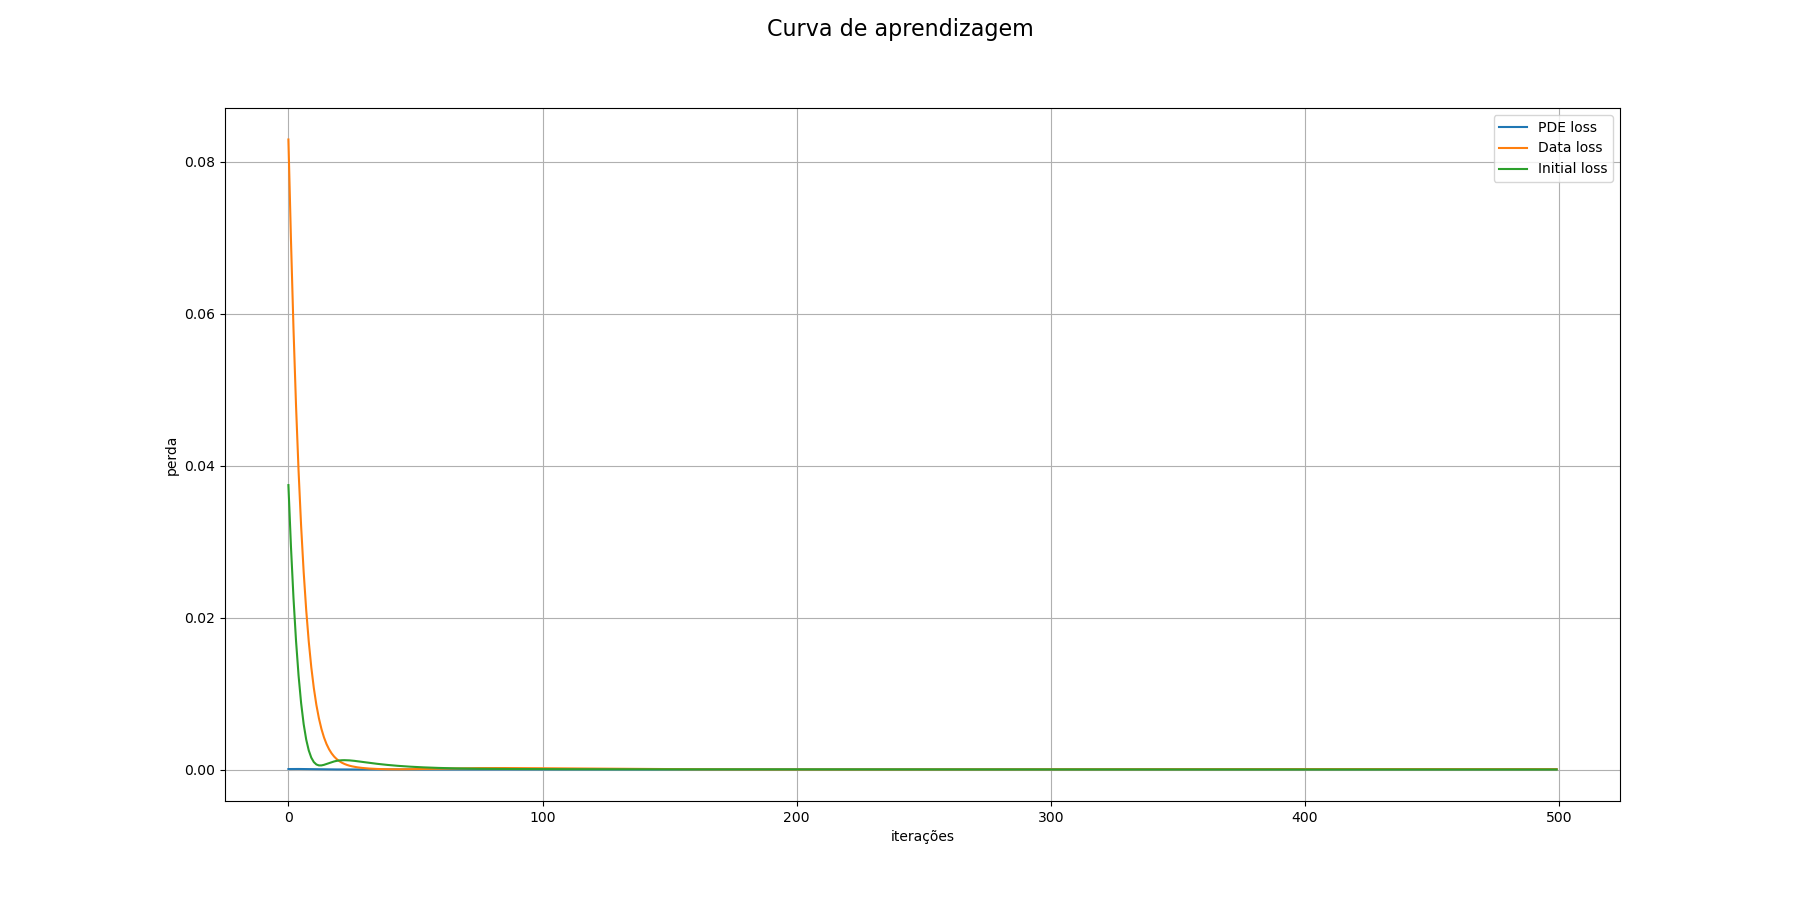

In [21]:
from IPython.display import Image

Image("learning_curves/" + arch_str + ".png")

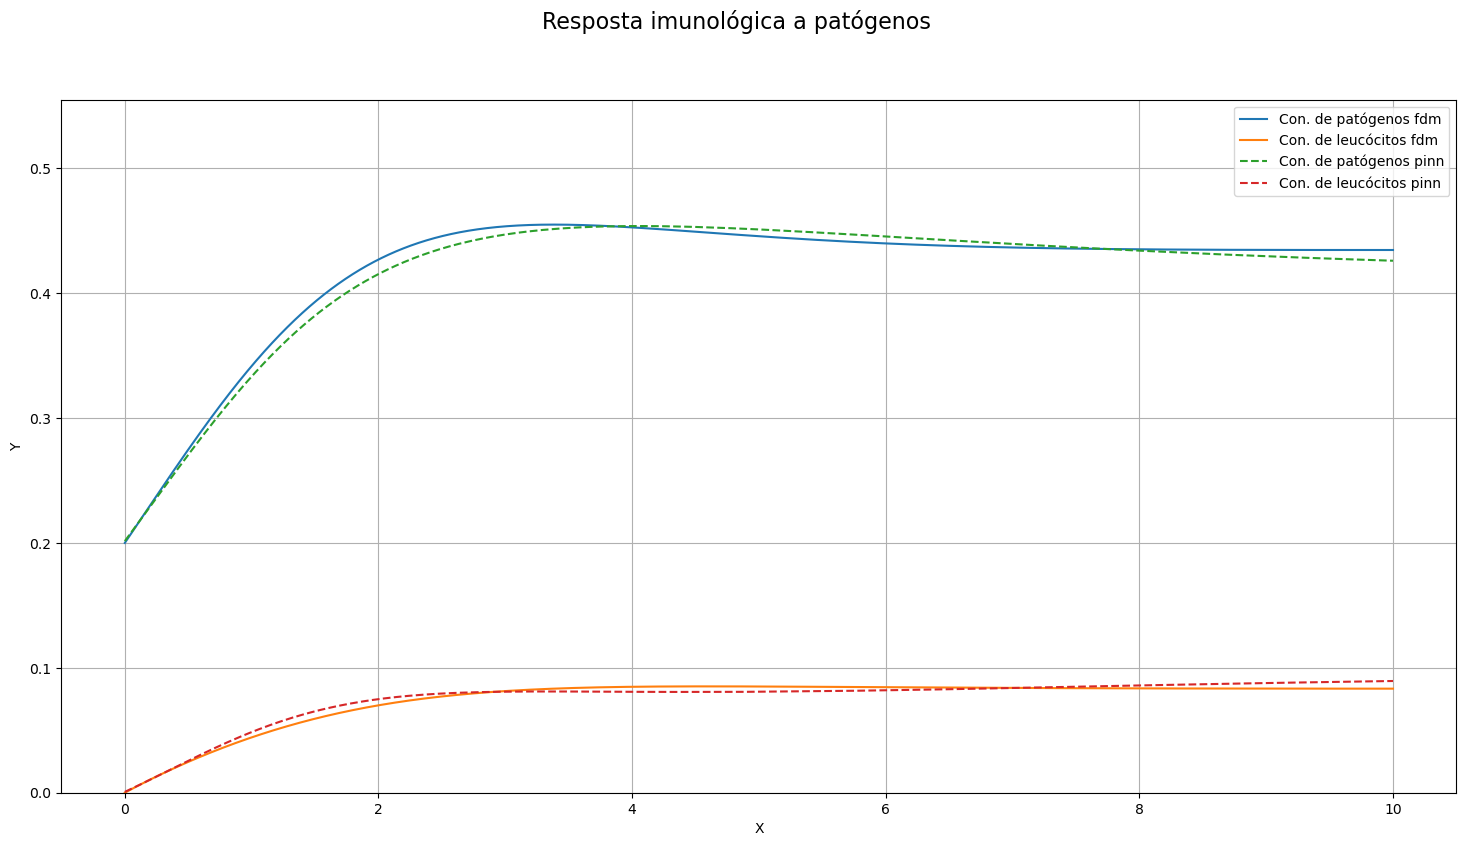

Speed Up: 87.50210925984241 +/-10.297432714839077


In [22]:
results_dict[choice]

Cl_pinn = results_dict[choice]["Cl_pinn"]
Cp_pinn = results_dict[choice]["Cp_pinn"]

struct_name = "k--0.0001__phi--0.2__ksi--0.0__cb--0.15__Cn_max--0.55__lambd_nb--1.8__mi_n--0.2__lambd_bn--0.1__y_n--0.1__t_lower--0.0__t_upper--10.0"


with open("edo_fdm_sim/Cp__" + struct_name + ".pkl", "rb") as f:
    Cp = pk.load(f)

with open("edo_fdm_sim/Cl__" + struct_name + ".pkl", "rb") as f:
    Cl = pk.load(f)

fig = plt.figure(figsize=[18, 9])

fig.suptitle("Resposta imunológica a patógenos", fontsize=16)


vmin = 0
vmax = np.max([np.max(Cl), np.max(Cp)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

ax.plot(np.linspace(0, 10, num=len(Cp)), Cp, label="Con. de patógenos fdm")
ax.plot(np.linspace(0, 10, num=len(Cp)), Cl, label="Con. de leucócitos fdm")
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cp_pinn,
    label="Con. de patógenos pinn",
    linestyle="--",
)
ax.plot(
    np.linspace(0, 10, num=len(Cp)),
    Cl_pinn,
    label="Con. de leucócitos pinn",
    linestyle="--",
)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_ylim(vmin, vmax + 0.1)
ax.legend()
ax.grid()

plt.show()

print(
    "Speed Up: {} +/-{}".format(
        results_dict[choice]["mean_speed_up"], results_dict[choice]["std_speed_up"]
    )
)